# Final Project
## Assignment Instructions

Create a multivariate prediction model and perform data analyis of a dataset you choose. This can be either a linear regression, or a classification. 
This includes:

* 1 point - All code blocks run without error. 
* 2 points - Create 2 charts exploring the data with respect to the prediction variable (label)
* 2 points - Create a hypothesis and perform a t.test to reject or fail to reject that hypothesis
* 1 point - Split the data into training set and testing set for each model and wrangle the data as desired
* 3 points - Create 2 prediction models of your chosen type (regression | classification), with at least one multivariate model  including visualizing the results of each model
* 2 points - Compare the performance of your models
* 1 point - Include a written analysis of your prediction referencing using data to support your conclusions.

The above is what is required to achieve full credit for the assignment. You are welcome and encouraged to go above and beyond these requirements, just be sure these requirements are fully met first. 

## R Features
* You are welcome to use any feature covered in this class
* You are welcome to load any library that is already installed in the virtual environment, but you cannot install new packages. You can also reference installed packages by library name::function_name to avoid naming conflicts
* Use set.seed() as necessary to ensure reproducability as the instructor / TA will run the code to grade it
* Ensure your code runs to completion within 60 minutes from start to finish. You may save and load pre-trained models with your instructor's prior permission if you feel you need to exceed this time limit.

## Dataset
* Your choice. Be sure the data lends itself to supervised learning, with a label and is appropriate for either regression or classification. Remove any personally identifiable data. 
* Suggested data source [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/datasets.html) and look for Data Types == Multivariate and Default Task in (Classification, Regression)
* The data would need to be uploaded to the virtual environment such that the instructor or TA can run the code without error. 

In [1]:
# Load libraries
# Load any additional libraries. No install.package()
library(lubridate)
library(tidyverse)
library(modeest)
library(forcats)

# set.seed for reproducible results
set.seed(1222) 


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

This is package 'modeest' written by P. PONCET.
For a complete list of functions, use 'library(help = "modeest")' or 'help.start()'.



# Load and explore data structure

In [2]:
#import data
url <-"https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip"

temp <- tempfile()
temp2 <- tempfile()

download.file(url, temp)
unzip(zipfile = temp, exdir = temp2)
df <- read_csv2(file.path(temp2, "Absenteeism_at_work.csv"))

names(df) <- df %>% names() %>% str_replace_all(' |/', '_')
df %>% write_csv("Absenteeism_at_work.csv")

#review data
df %>% glimpse()

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  .default = col_integer(),
  `Work load Average/day` = col_number()
)
See spec(...) for full column specifications.


Observations: 740
Variables: 21
$ ID                              <int> 11, 36, 3, 7, 11, 3, 10, 20, 14, 1,...
$ Reason_for_absence              <int> 26, 0, 23, 7, 23, 23, 22, 23, 19, 2...
$ Month_of_absence                <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...
$ Day_of_the_week                 <int> 3, 3, 4, 5, 5, 6, 6, 6, 2, 2, 2, 3,...
$ Seasons                         <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ Transportation_expense          <int> 289, 118, 179, 279, 289, 179, 361, ...
$ Distance_from_Residence_to_Work <int> 36, 13, 51, 5, 36, 51, 52, 50, 12, ...
$ Service_time                    <int> 13, 18, 18, 14, 13, 18, 3, 11, 14, ...
$ Age                             <int> 33, 50, 38, 39, 33, 38, 28, 36, 34,...
$ Work_load_Average_day           <dbl> 239554, 239554, 239554, 239554, 239...
$ Hit_target                      <int> 97, 97, 97, 97, 97, 97, 97, 97, 97,...
$ Disciplinary_failure            <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Education         

# Data processing
Create a new data frame(s) with appropriate data types and data cleaning for the data.

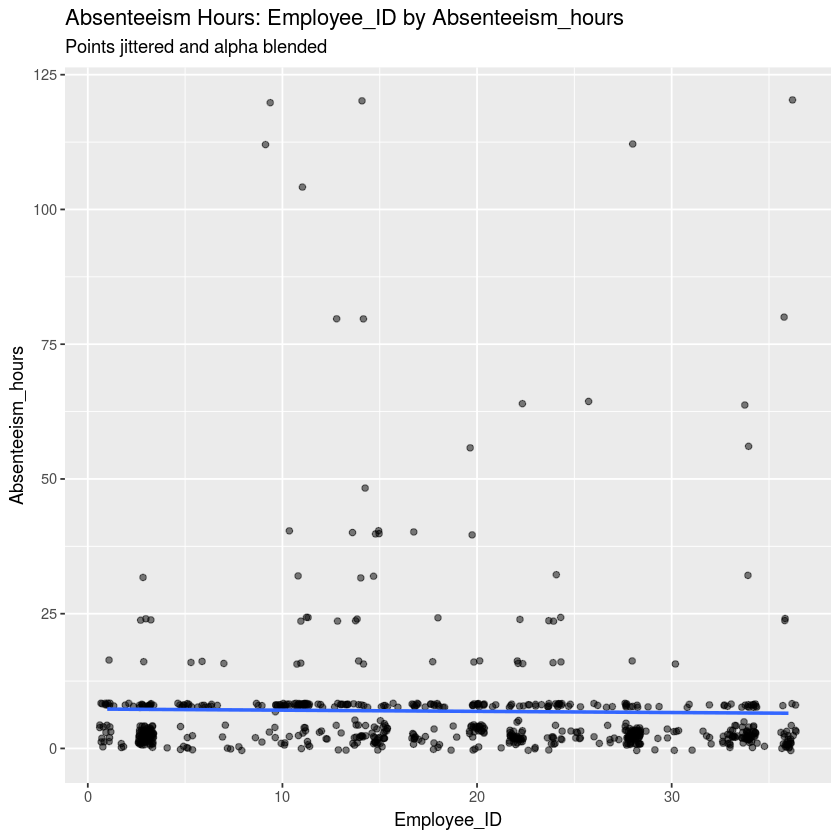

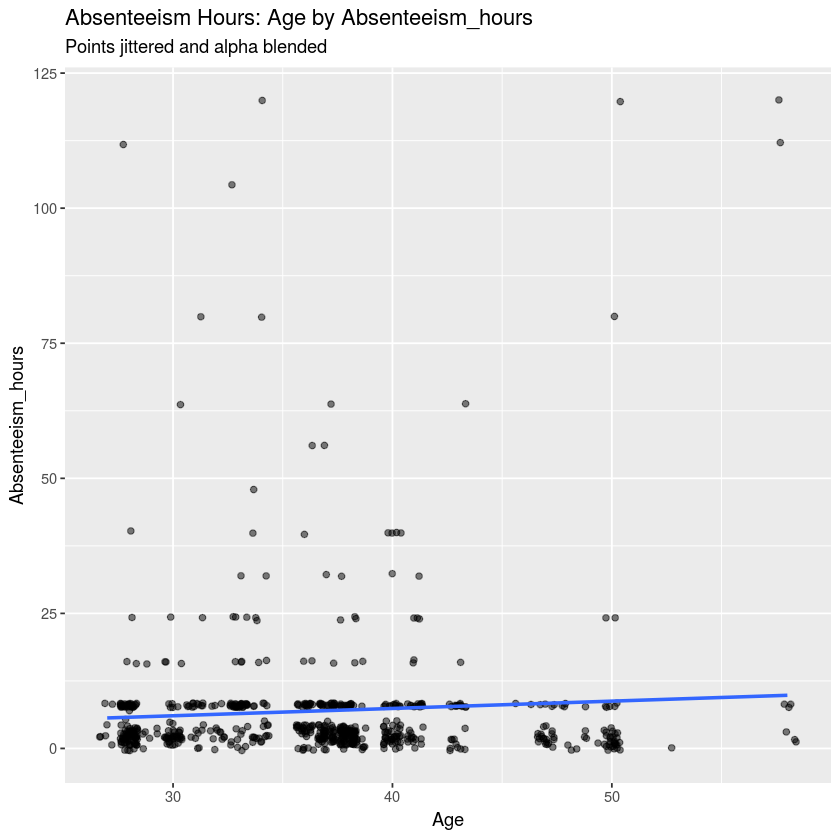

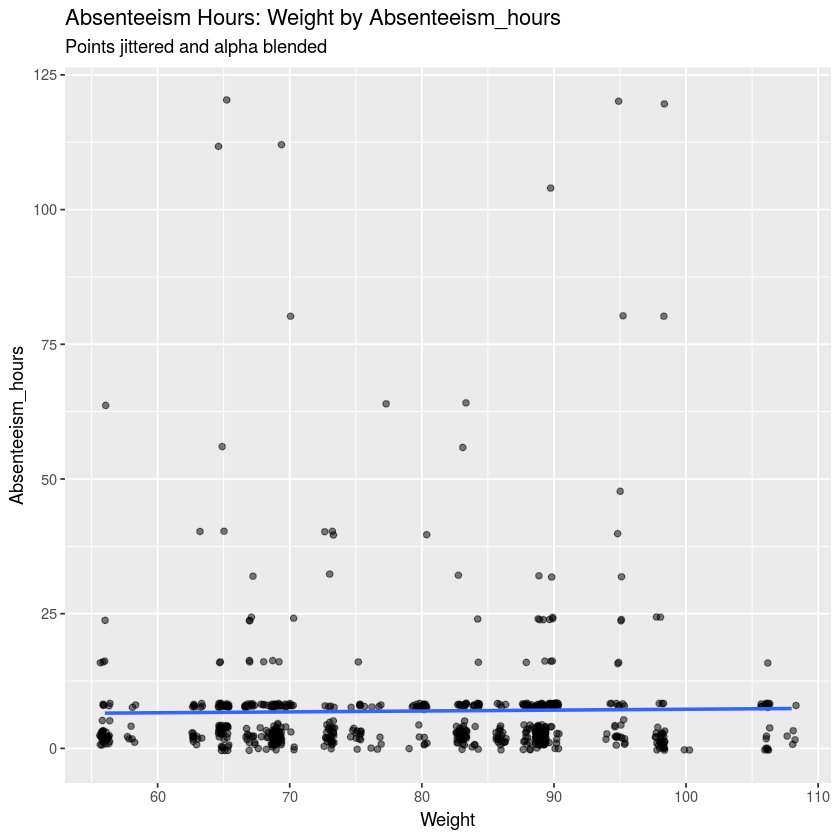

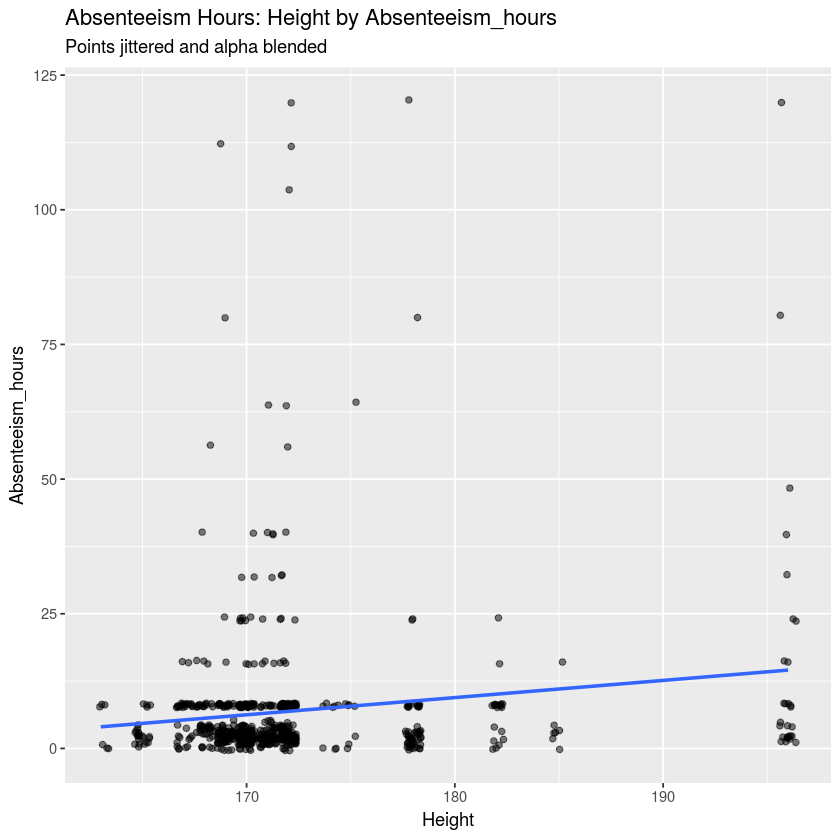

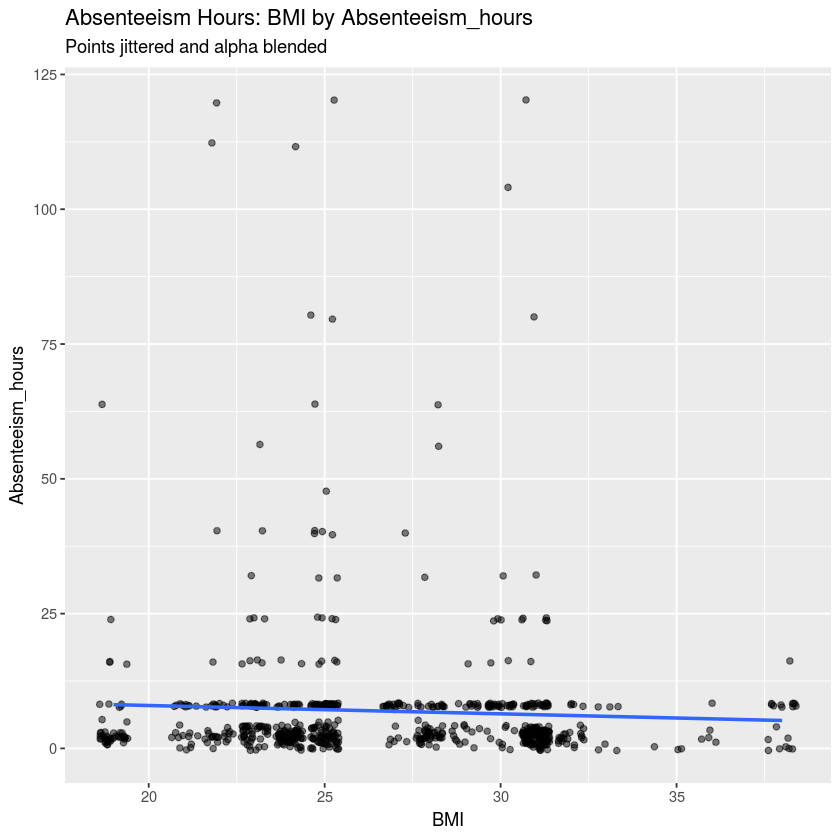

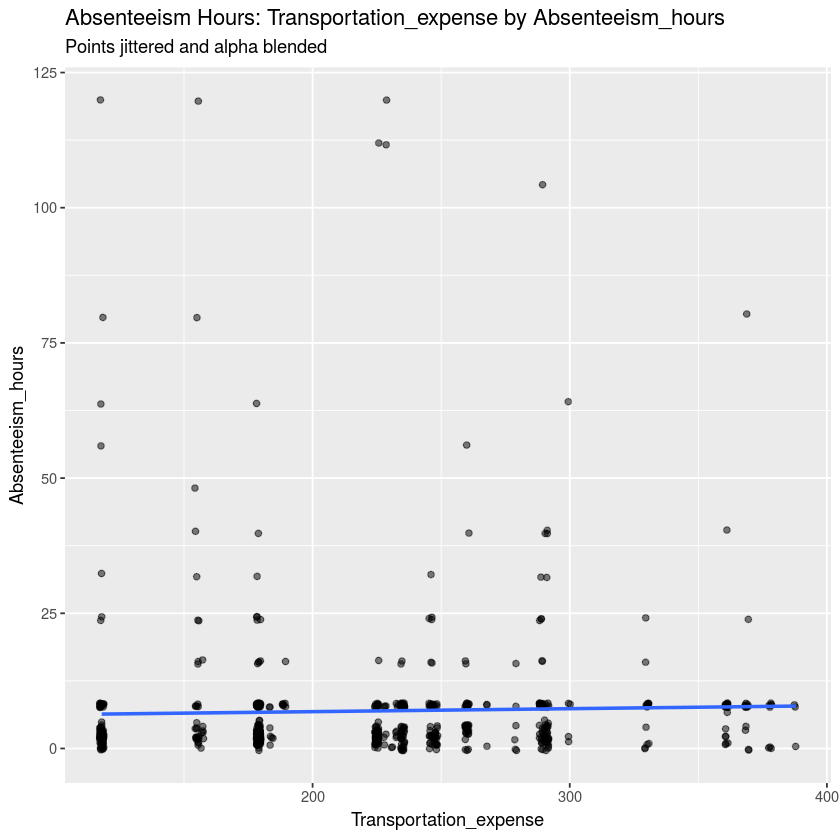

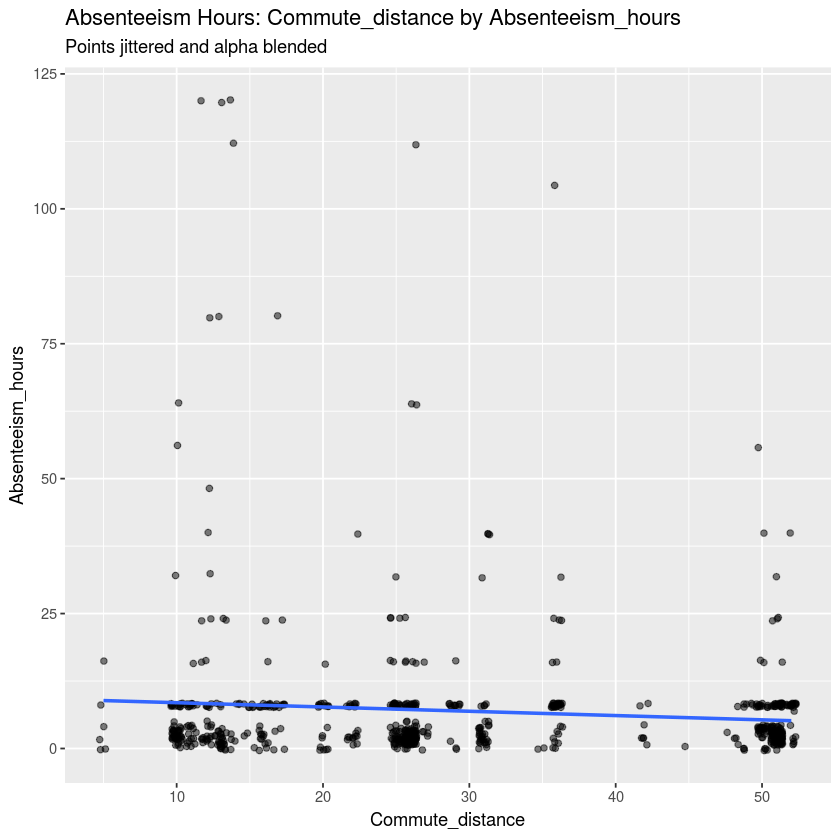

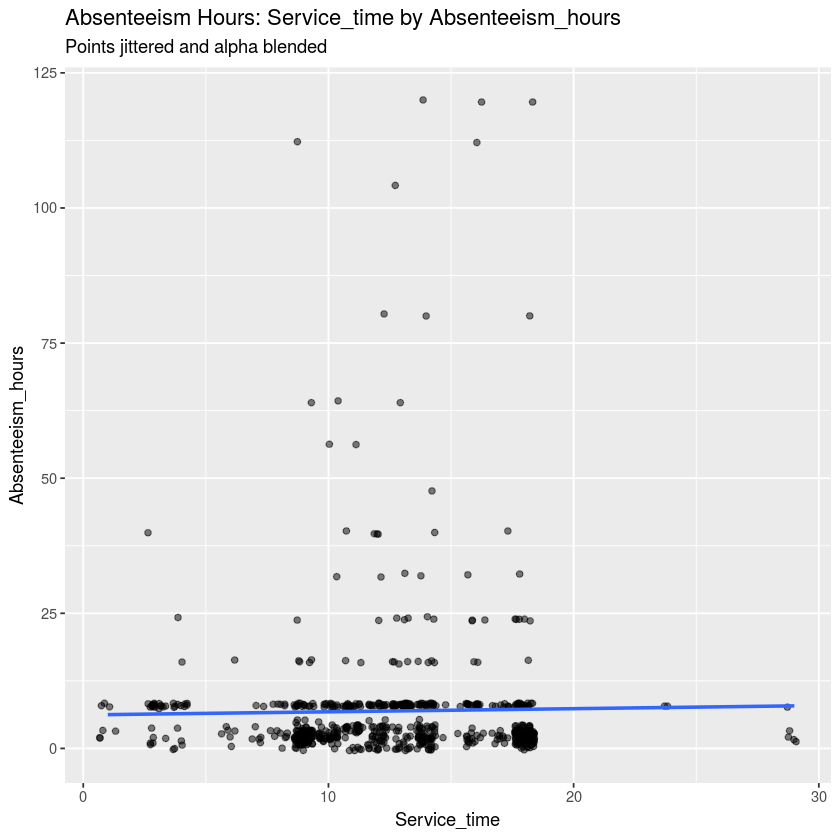

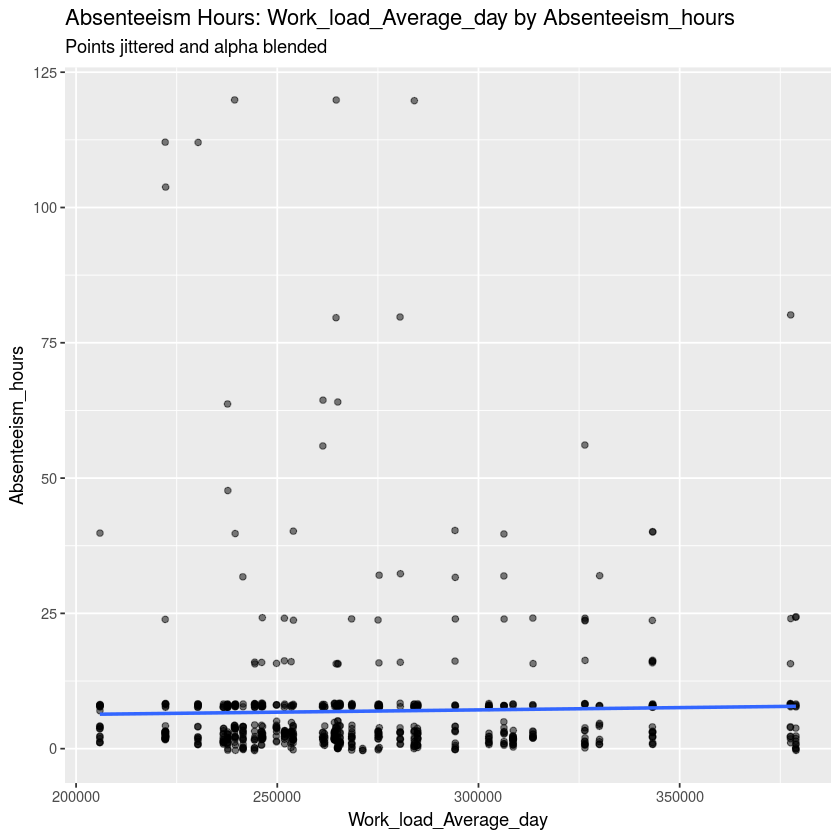

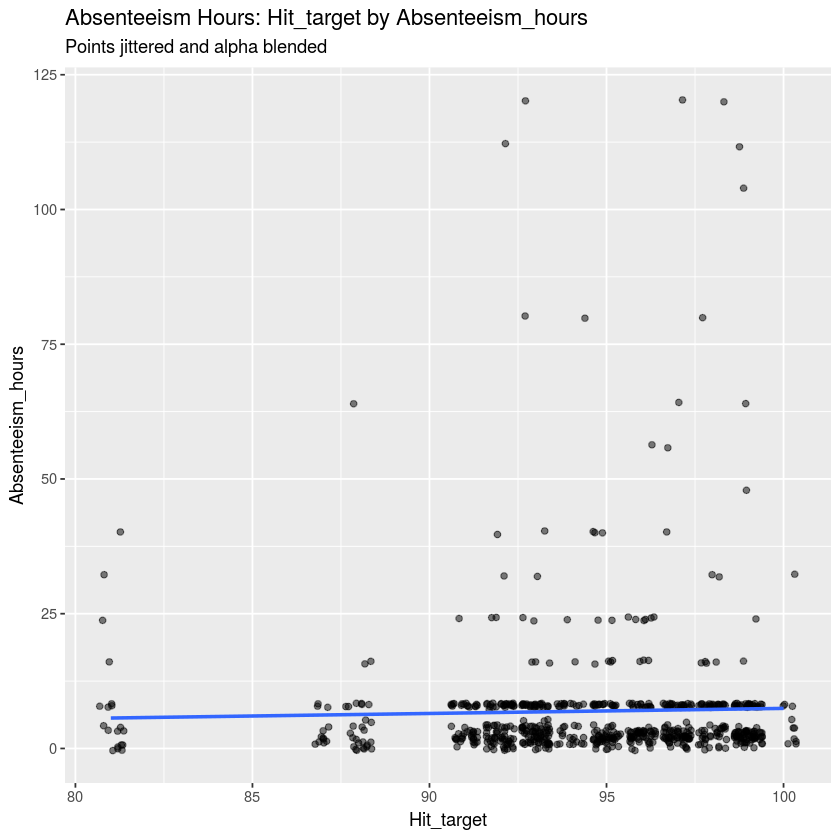

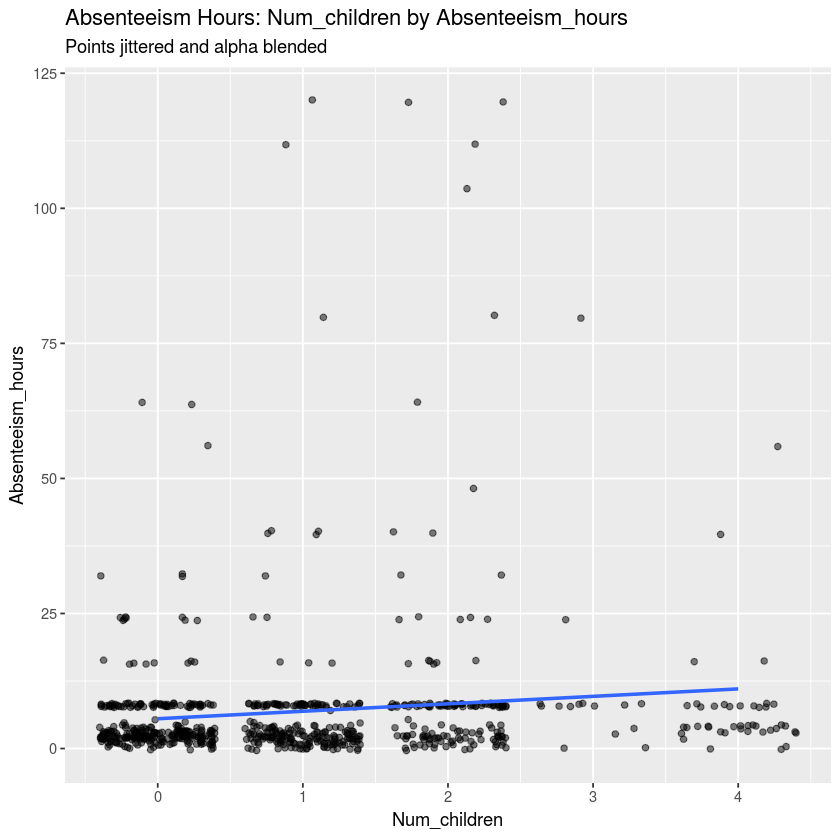

Absenteeism_hours mean: 6.92432432432432 
Absenteeism_hours median: 3 
Absenteeism_hours mode: 8 
Absenteeism_hours variance: 177.715510368284 
Absenteeism_hours std. deviation: 13.3309981009782 
Absenteeism_hours std. error: 0.490057236547198 


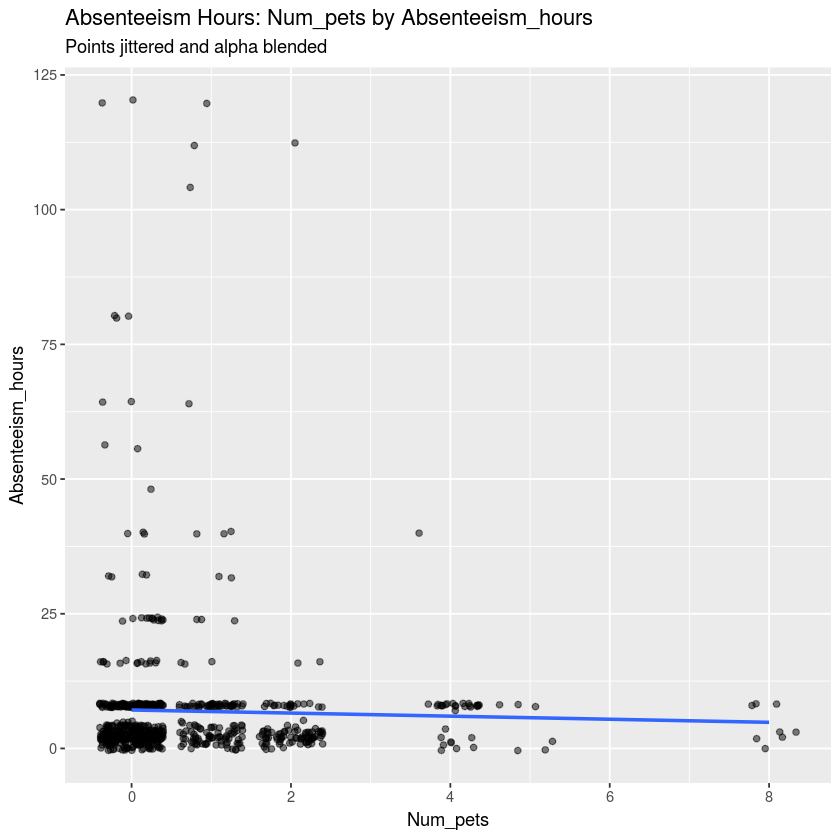

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message:
“Groups with fewer than two data points have been dropped.”

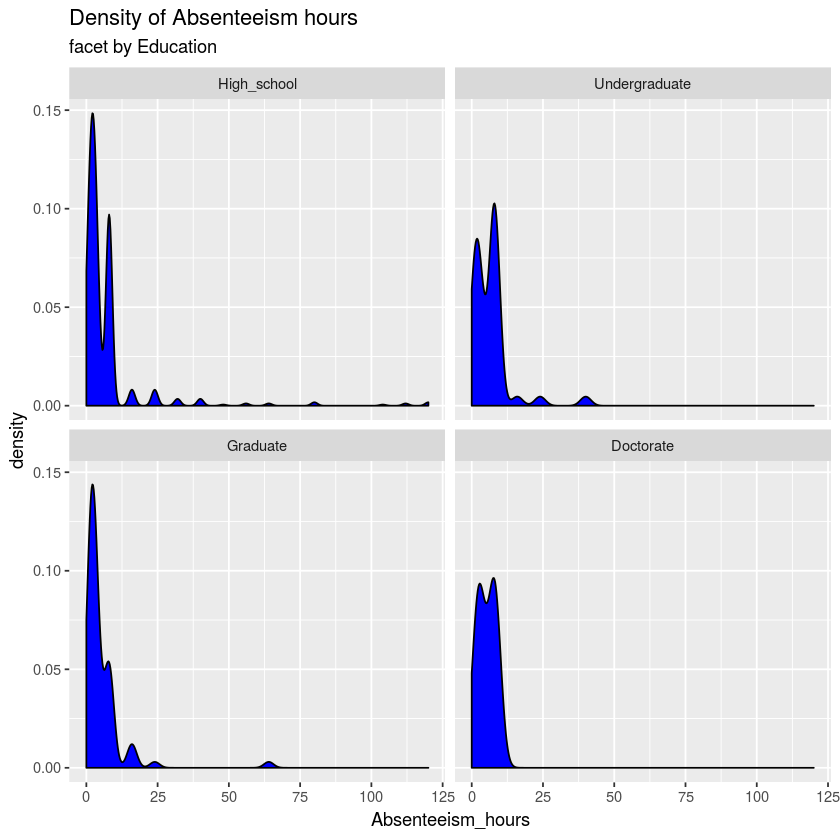

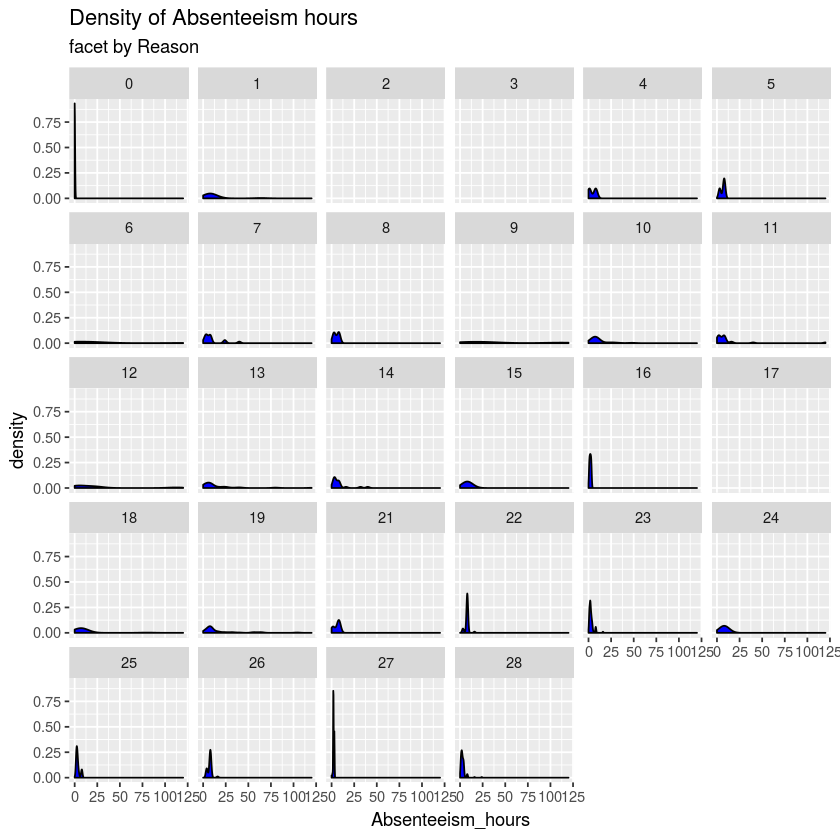

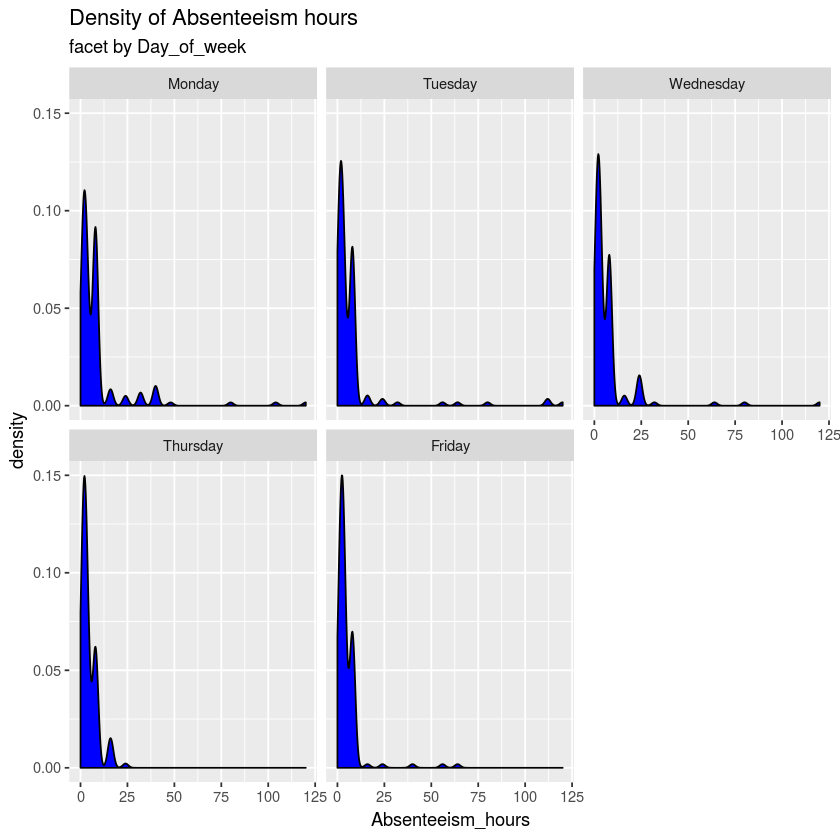

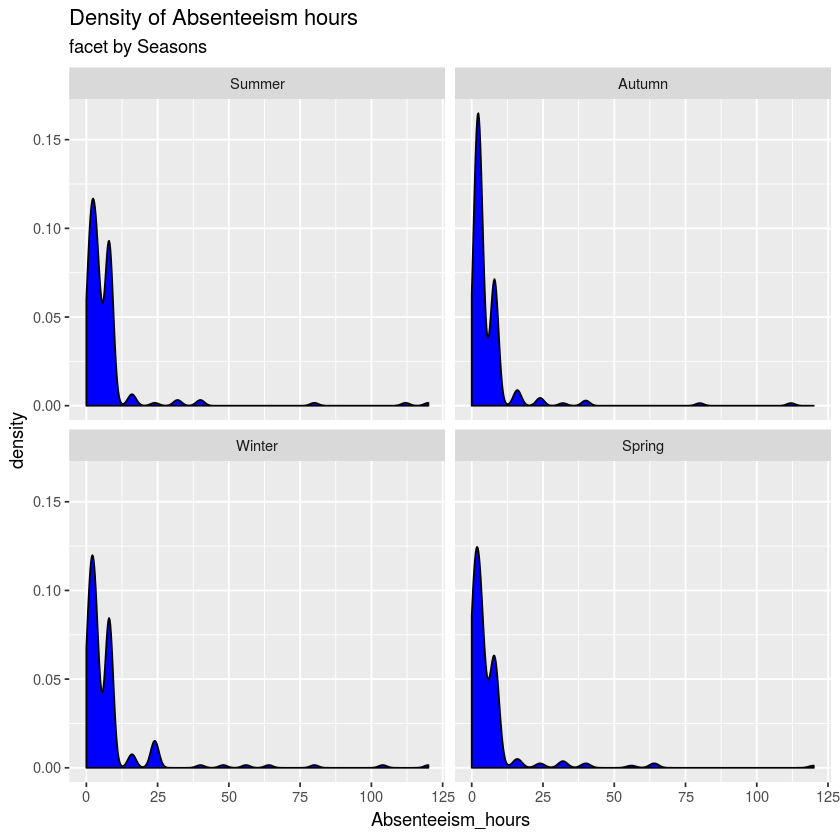

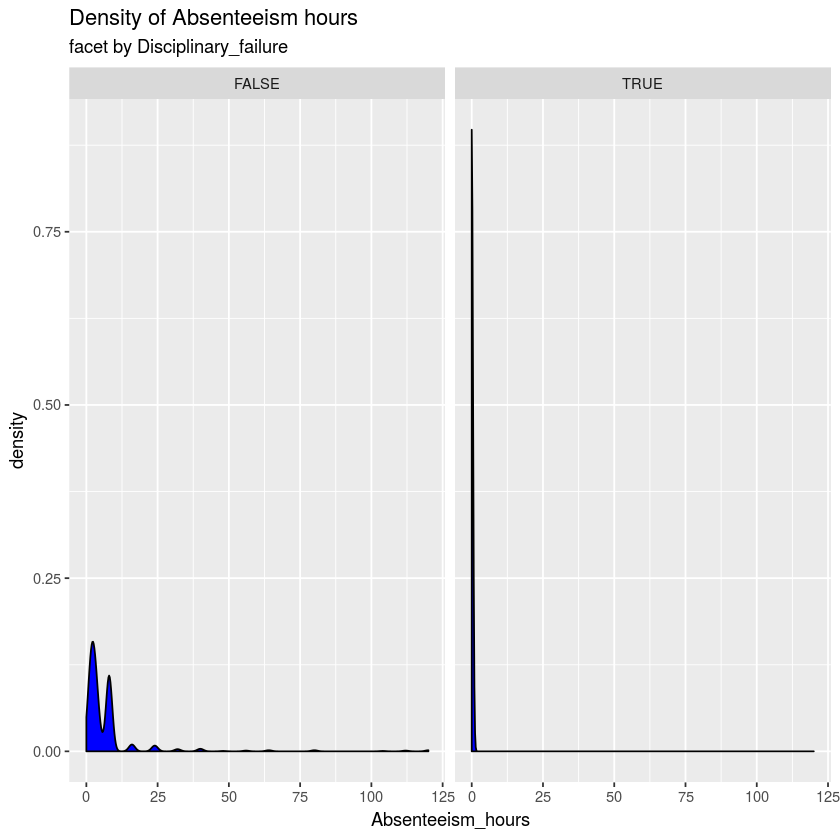

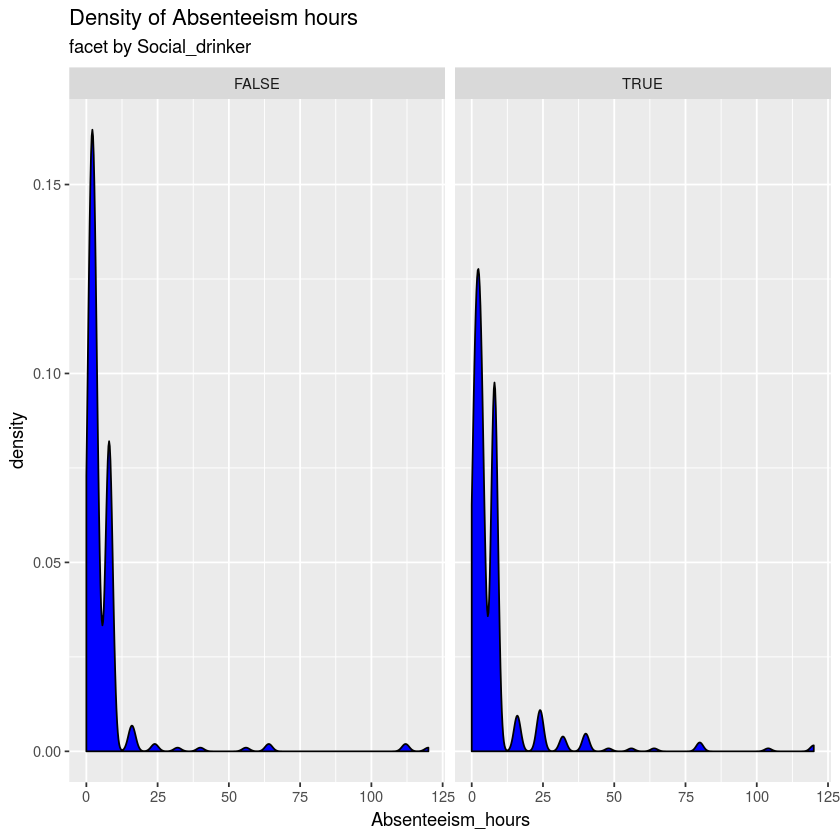

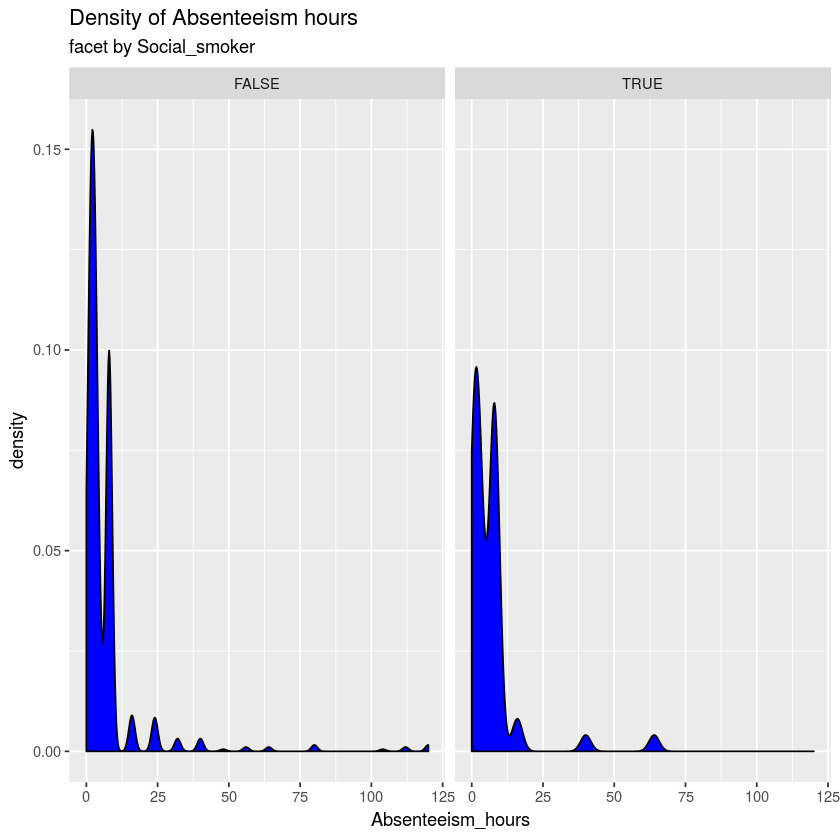

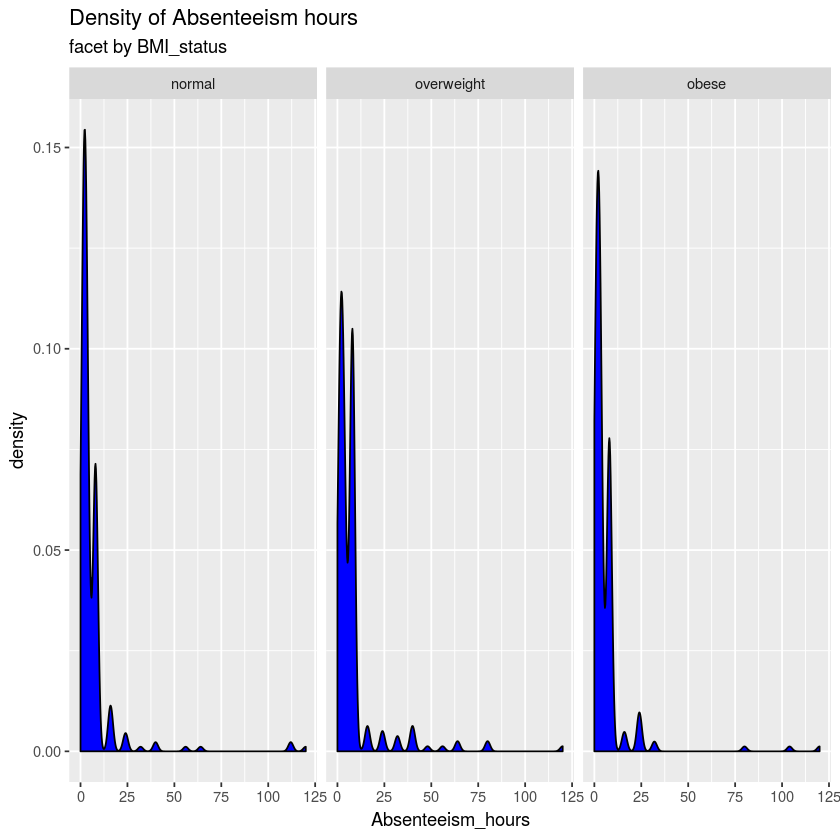

In [3]:
#change data types and column names
df <- df %>% mutate(PK = row_number(),
                      Employee_ID = ID,
                      Reason = as.factor(Reason_for_absence),
                      Month = as.factor(Month_of_absence),
                      Day_of_week = as.character(Day_of_the_week),
                      Day_of_week = str_replace(Day_of_week, "2", "Monday"),
                      Day_of_week = str_replace(Day_of_week, "3", "Tuesday"),
                      Day_of_week = str_replace(Day_of_week, "4", "Wednesday"),
                      Day_of_week = str_replace(Day_of_week, "5", "Thursday"),
                      Day_of_week = str_replace(Day_of_week, "6", "Friday"),
                      Day_of_week = as.factor(Day_of_week),
                      Day_of_week = fct_relevel(Day_of_week, "Monday", "Tuesday", "Wednesday","Thursday", "Friday"),
                      Seasons = as.character(Seasons),
                      Seasons = str_replace(Seasons, "1", "Summer"),
                      Seasons = str_replace(Seasons, "2", "Autumn"),
                      Seasons = str_replace(Seasons, "3", "Winter"),
                      Seasons = str_replace(Seasons, "4", "Spring"),
                      Seasons = as.factor(Seasons),
                      Seasons = fct_relevel(Seasons, "Summer", "Autumn", "Winter", "Spring"),
                      Commute_distance = Distance_from_Residence_to_Work,
                      Disciplinary_failure = as.logical(Disciplinary_failure),
                      Education = as.character(Education),
                      Education = str_replace(Education, "1", "High_school"),
                      Education = str_replace(Education, "2", "Undergraduate"),
                      Education = str_replace(Education, "3", "Graduate"),
                      Education = str_replace(Education, "4", "Doctorate"),
                      Education = as.ordered(Education),
                      Education = fct_relevel(Education, "High_school", "Undergraduate", "Graduate", "Doctorate"),
                      Num_children = Son,
                      Social_drinker = as.logical(Social_drinker),
                      Social_smoker = as.logical(Social_smoker),
                      Num_pets = Pet,
                      BMI = Body_mass_index,
                      Absenteeism_hours = Absenteeism_time_in_hours)

df <- df %>% select(PK, Employee_ID, Reason, Month, Day_of_week, Seasons, Age, Education, Weight, Height, BMI, 
                    Transportation_expense, Commute_distance, Service_time, Work_load_Average_day, Hit_target, 
                    Disciplinary_failure, Num_children, Num_pets, Social_drinker, Social_smoker, Absenteeism_hours)

#look for basic trends
y_var <- "Absenteeism_hours"

gg_scatter <- function(data, x_col, y_var, color) {
    if(is.numeric(data[[x_col]])){
      plt <- data %>% ggplot(mapping=aes_string(x_col, y_var))+
        geom_jitter(alpha=0.5)+
        geom_smooth(method="lm", se=FALSE)+
        labs(title=str_c("Absenteeism Hours: ", x_col, " by ", y_var), subtitle="Points jittered and alpha blended")
      plt %>% print()
        }
}

y_col <- c("Absenteeism_hours|PK")
x_cols <- df %>% names()
x_cols <- x_cols[!str_detect(x_cols, y_col)]

x_cols %>% walk(gg_scatter, data=df, y_var=y_var)

#create new data frame for variables with trends
df <- df %>% select(PK, Education, Reason, Day_of_week, Seasons, BMI, Transportation_expense, Service_time, Commute_distance, 
                    Age, Hit_target, Disciplinary_failure, Num_children, Num_pets, Social_drinker, Social_smoker, 
                    Absenteeism_hours)

#group BMI values
normal <- df %>% filter(BMI >= 19, BMI <= 24) %>% 
  select(PK, BMI) %>% rename(normal=BMI)
overweight <- df %>% filter(BMI >= 25, BMI <= 29) %>% 
  select(PK, BMI) %>% rename(overweight=BMI)
obese <- df %>% filter(BMI >= 30, BMI <= 39) %>% 
  select(PK, BMI) %>% rename(obese=BMI)

df <- df %>%
  left_join(normal, by="PK") %>%
  left_join(overweight, by="PK") %>%
  left_join(obese, by="PK")

df <- df %>% 
  gather(key=BMI_status, value=bmi, normal:obese) %>% 
  drop_na()

df <- df %>% 
  mutate(BMI_status = as.ordered(BMI_status) %>% 
           fct_relevel(c("normal", "overweight", "obese"))) %>% 
  select(-BMI, -bmi)

#view central tendency statistics
mean <- mean(df$Absenteeism_hours)
cat(str_c(y_var, " mean: ", mean), "\n")
median <- median(df$Absenteeism_hours)
cat(str_c(y_var, " median: ", median), "\n")
mode <- mfv(df$Absenteeism_hours)
cat(str_c(y_var, " mode: ", mode), "\n")
cat(str_c(y_var, " variance: ", var(df$Absenteeism_hours)), "\n")
cat(str_c(y_var, " std. deviation: ", sd(df$Absenteeism_hours)), "\n")
cat(str_c(y_var, " std. error: ", sd(df$Absenteeism_hours) / 
            sqrt(length(df$Absenteeism_hours))), "\n")

#look for more patterns/trends
gg_facet <- function(data, facet) {
  if(!is.numeric(data[[facet]])){
    plt <- data %>% ggplot(mapping=aes_string("Absenteeism_hours"))+
       geom_density(fill="blue")+
       facet_wrap(paste("~", facet))+
       labs(title="Density of Absenteeism hours", 
         subtitle=str_c("facet by ", facet))
     plt %>% print()
      }
}

facets <- df %>% names()
facets <- facets[!str_detect(facets, y_col)]

for(facet in facets){
  gg_facet(data=df, facet)
}


# Explore prediction variable

## Chart 1

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 40 rows containing missing values (geom_point).”

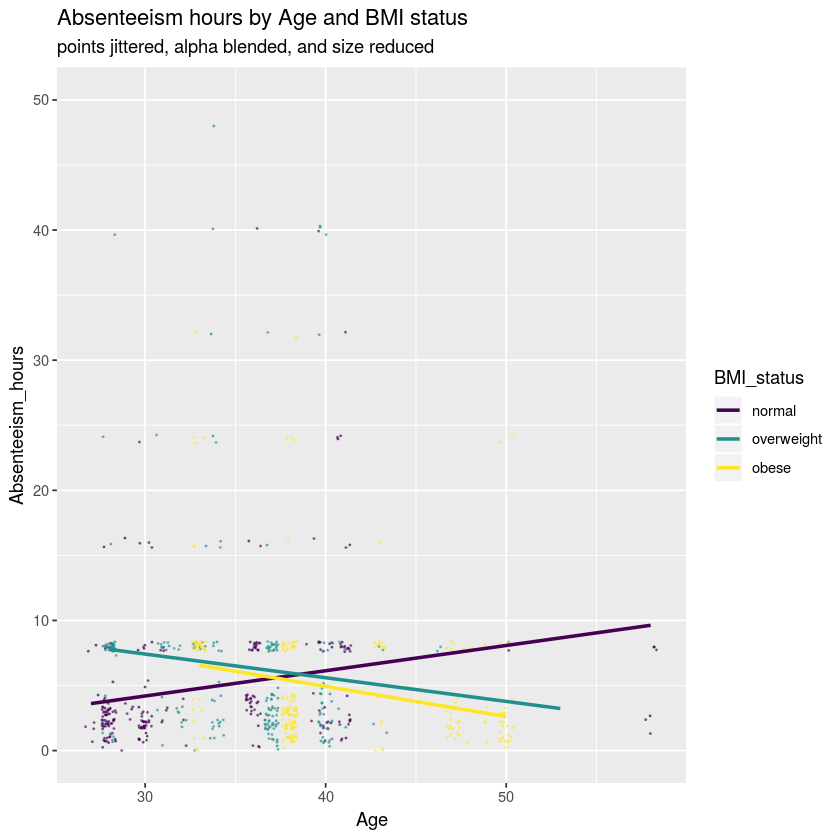

In [4]:
#Would like to understand the correlation between age, BMI and absenteeism hours 
df %>% ggplot(aes(Age, Absenteeism_hours, color=BMI_status))+
  geom_jitter(alpha=0.5,size=0.2)+
  geom_smooth(method="lm", se=FALSE)+
  ylim(0,50)+
  labs(title="Absenteeism hours by Age and BMI status", subtitle="points jittered, alpha blended, and size reduced")

### Analysis of Chart 1
For normal BMI status, absenteeism hours increase as age increases. For overweight and obese status, absenteeism hours tend to decrease as age increases.The different BMI status lines intersect at around 37 years old, meaning if someone is older than 37 with a normal BMI, they have an increased risk for greater absenteeism hours, compared to being younger or overweight/obese.

## Chart 2

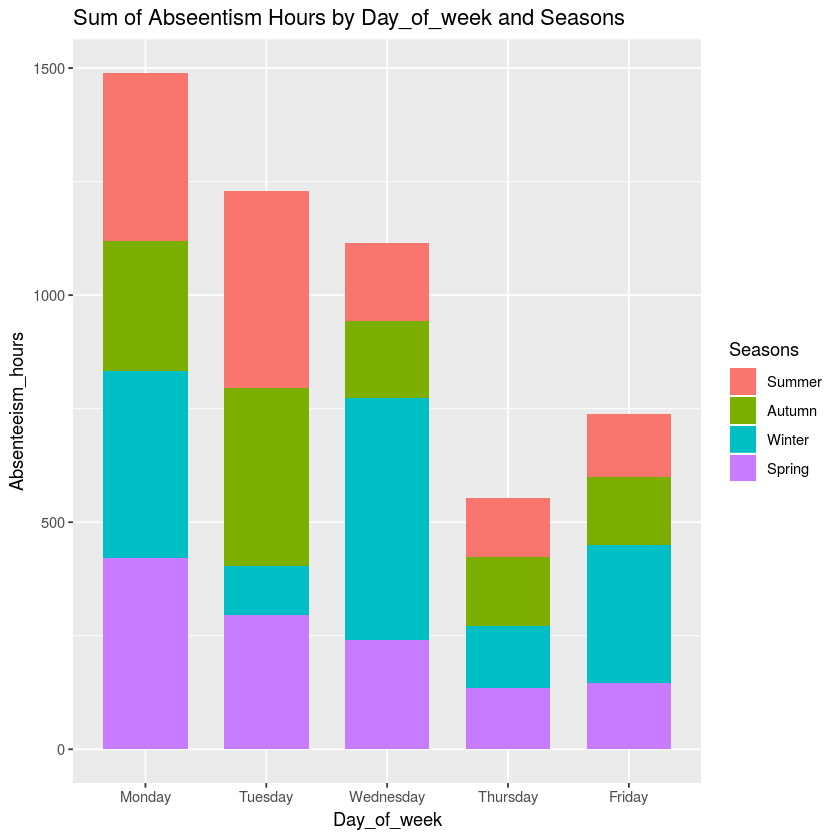

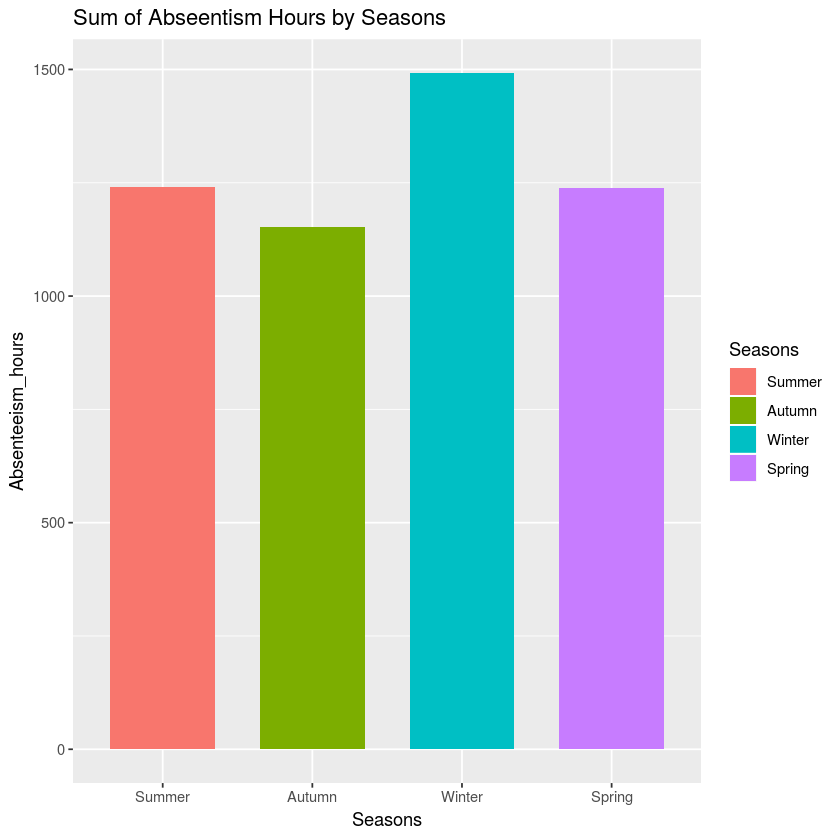

In [5]:
#Would like to know which day of the week and seasons have the highest total absenteeism hours 
df%>%ggplot(aes(x=Day_of_week,y=Absenteeism_hours,fill=Seasons))+
geom_col(width=0.7)+
labs(title="Sum of Abseentism Hours by Day_of_week and Seasons")

df%>%ggplot(aes(x=Seasons,y=Absenteeism_hours,fill=Seasons))+
geom_col(width=0.7)+
labs(title="Sum of Abseentism Hours by Seasons")

### Analysis of Chart 2
Mondays have the highest total absenteeism hours while Thursdays have the lowest. Winter has the highest absenteeism hours, at almost 1500 hours. Autumn has the lowest around 1150.

## Chart 3

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 37 rows containing missing values (geom_point).”

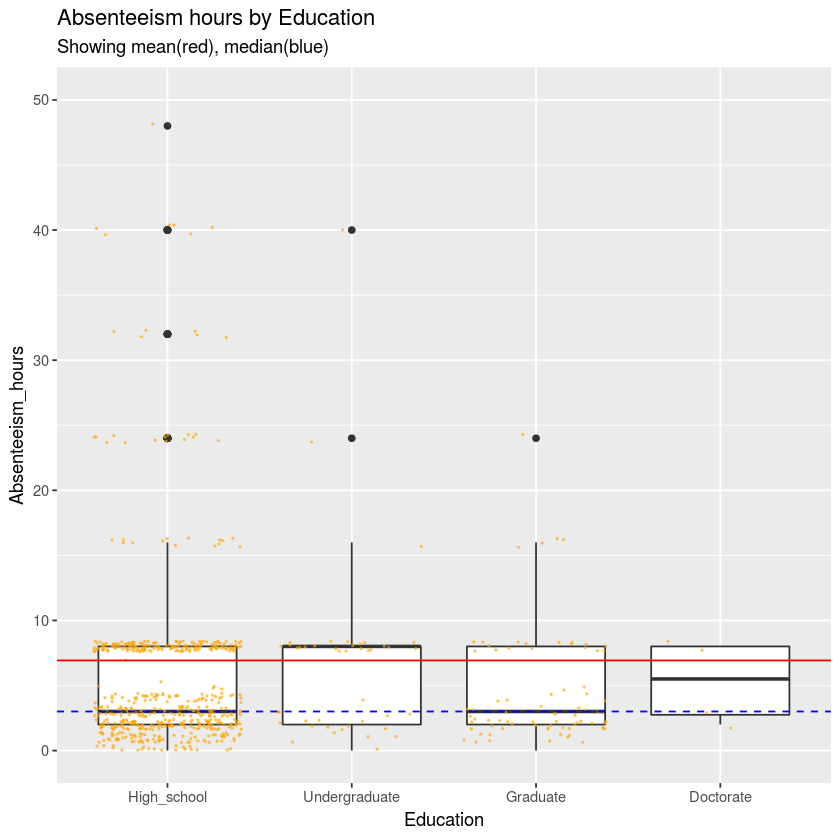

In [6]:
#Would like to know correlation between Absenteeism hours and Education level
df %>% ggplot(aes(x=Education, y=Absenteeism_hours))+
  geom_boxplot()+
  ylim(0,50)+
  geom_jitter(alpha=0.5, color="orange", size=0.3)+
  geom_hline(yintercept=mean, color="red")+
  geom_hline(yintercept=median, color="blue", 
             linetype="dashed")+
  labs(title="Absenteeism hours by Education", subtitle="Showing mean(red), median(blue)")

### Analysis of Chart 3
People with lower degrees do not have the higher average absenteeism hours. There does not appear to be a trend that as Education increases, absenteeism hours decrease.

Further hypothesis testing will be done to understand whether mean absenteeism hours between different education levels are statistically significant.

# Hypothesis Testing

### Data frame preparation to do T-test among Education Levels

In [7]:
df_High_school <- df %>% filter(Education == "High_school")
df_High_school%>%glimpse()
df_undergrad<- df %>% filter(Education == "Undergraduate")
df_undergrad%>%glimpse
df_grad <- df %>% filter(Education == "Graduate")
df_grad%>%glimpse

cat(str_c("High_school: mean = ", df_High_school$Absenteeism_hours %>% mean() %>% round(1)))

cat(str_c("Undergrad: mean = ", df_undergrad$Absenteeism_hours %>% mean() %>% round(1))) 

cat(str_c("Graduate: mean = ", df_grad$Absenteeism_hours %>% mean() %>% round(1)))

Observations: 611
Variables: 17
$ PK                     <int> 4, 8, 11, 12, 13, 16, 24, 28, 38, 40, 41, 49...
$ Education              <ord> High_school, High_school, High_school, High_...
$ Reason                 <fct> 7, 23, 1, 1, 11, 14, 28, 28, 11, 23, 23, 22,...
$ Day_of_week            <fct> Thursday, Friday, Monday, Tuesday, Wednesday...
$ Seasons                <fct> Summer, Summer, Summer, Summer, Summer, Summ...
$ Transportation_expense <int> 279, 260, 260, 260, 260, 246, 260, 157, 291,...
$ Service_time           <int> 14, 11, 11, 11, 11, 16, 11, 6, 12, 11, 7, 11...
$ Commute_distance       <int> 5, 50, 50, 50, 50, 25, 50, 27, 50, 50, 42, 5...
$ Age                    <int> 39, 36, 36, 36, 36, 41, 36, 29, 32, 36, 27, ...
$ Hit_target             <int> 97, 97, 97, 97, 97, 97, 92, 92, 92, 92, 92, ...
$ Disciplinary_failure   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA...
$ Num_children           <int> 2, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 1, 1,...
$ Num_pets          

### Two Sided T Test
#### H Null: People with undergradudate and graduate degrees do not have different average absenteeism hours
#### H Alternative: The average absenteeism hours between people with undergraduate or graduate degrees are different

In [8]:
t.test(df_undergrad$Absenteeism_hours, df_grad$Absenteeism_hours,conf.level=0.95,alternative="two.sided")


	Welch Two Sample t-test

data:  df_undergrad$Absenteeism_hours and df_grad$Absenteeism_hours
t = 0.84021, df = 106.91, p-value = 0.4027
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.530001  3.780964
sample estimates:
mean of x mean of y 
 6.391304  5.265823 


#### As p-value of the t-test is greater than 0.05, we cannot reject the null hypothesis. Which means, according to these samples of the whole population, there is no statistically significant difference of average absenteeism hours between people with undergrad and graduate degrees.

### One sided T Test
#### H Null: People with high school degrees have fewer or the same average absenteeism hours than those with graduate degrees
#### H Alternative: The average absenteeism hours for people with high school degrees is higher than people with graduate degrees

In [9]:
t.test(df_High_school$Absenteeism_hours, df_grad$Absenteeism_hours,conf.level=0.95,alternative="greater")


	Welch Two Sample t-test

data:  df_High_school$Absenteeism_hours and df_grad$Absenteeism_hours
t = 1.8057, df = 152.73, p-value = 0.03646
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1607247       Inf
sample estimates:
mean of x mean of y 
 7.189853  5.265823 


#### As p-value of the t-test is smaller than 0.05, we reject the null hypothesis. Which means, according to these samples of the whole population, the average absenteeism hours of those with high school degrees is higher than people with graduate degrees

# Variables preparation for training model

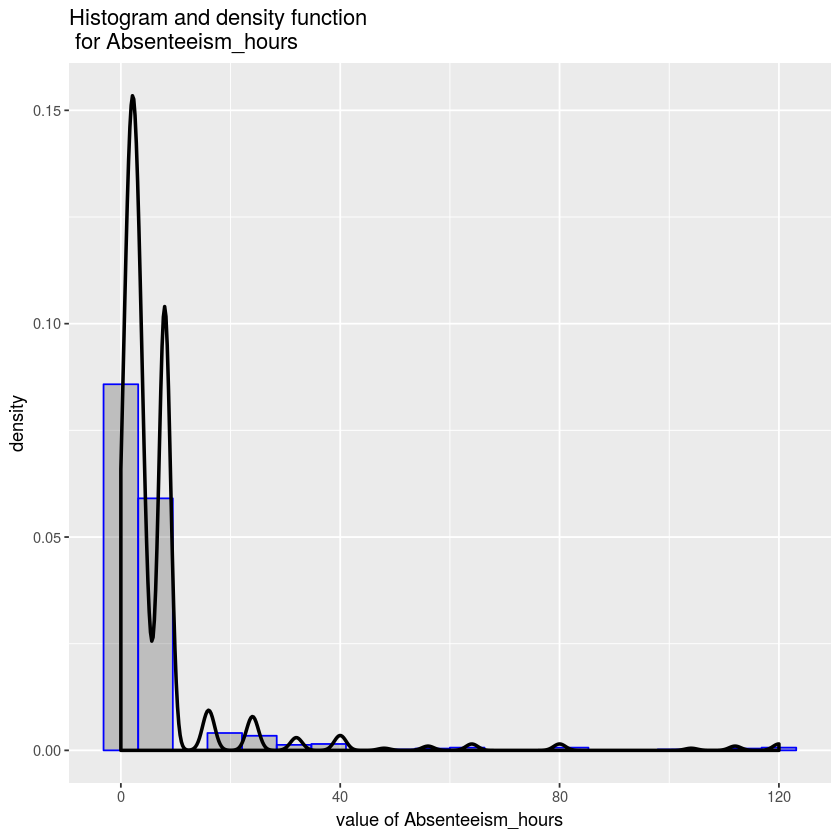

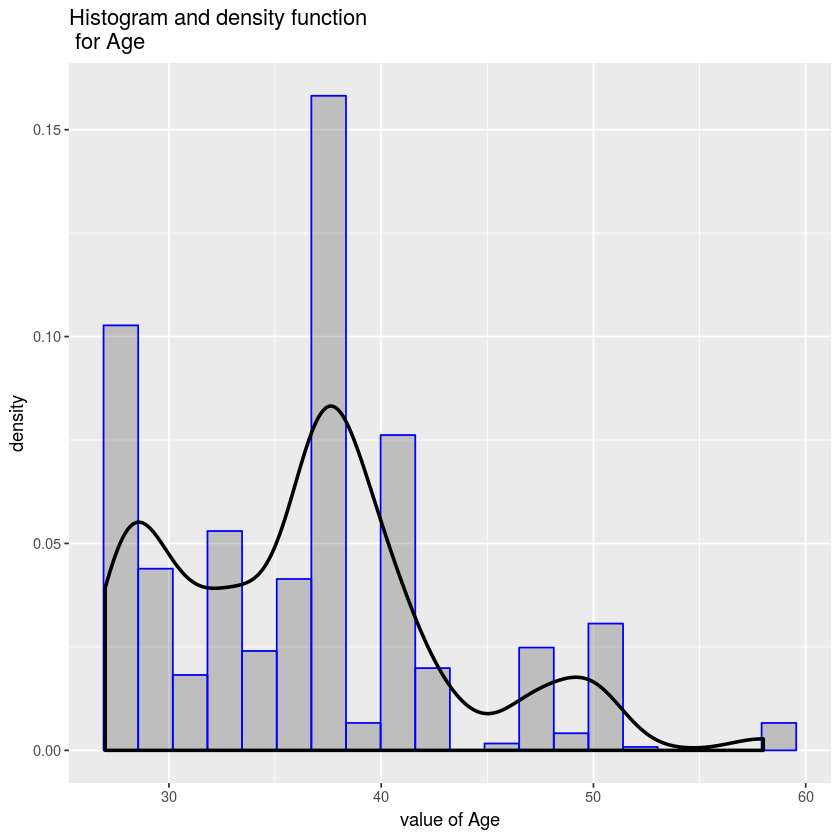

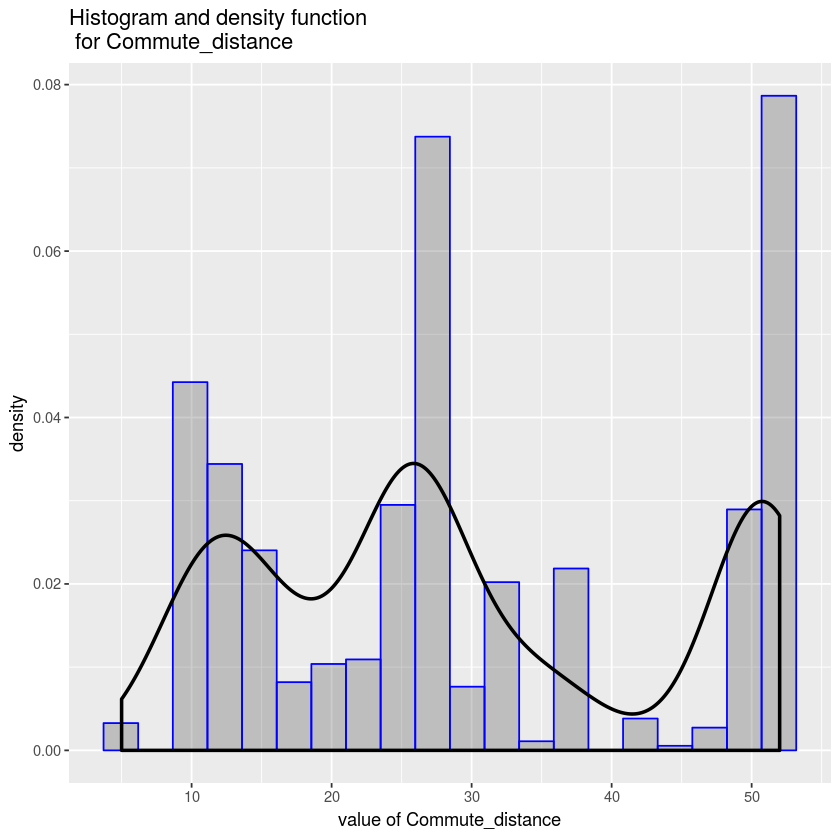

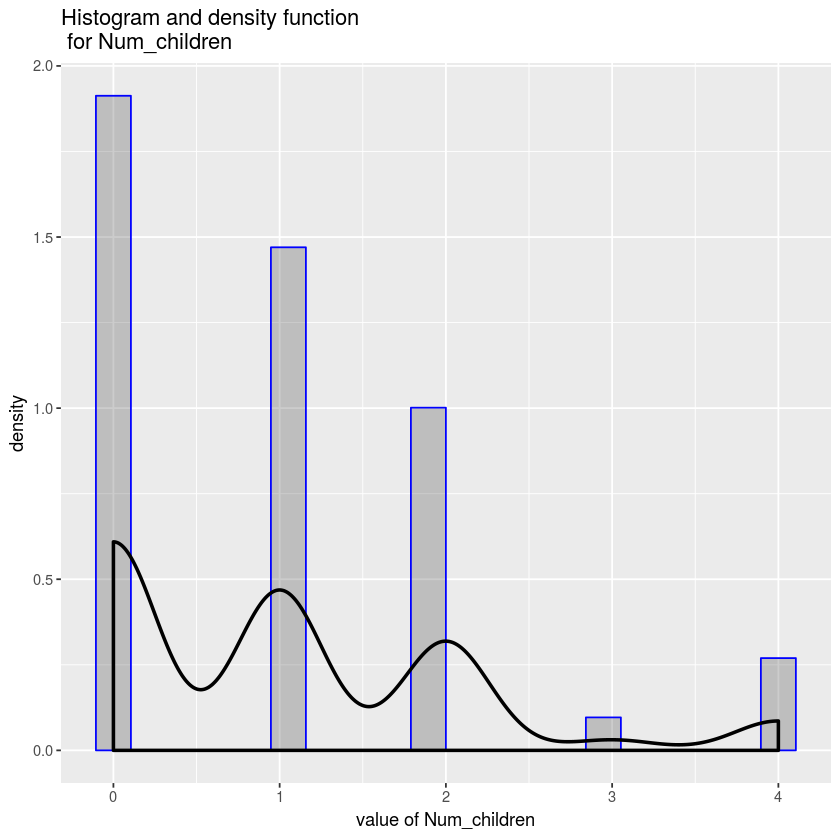

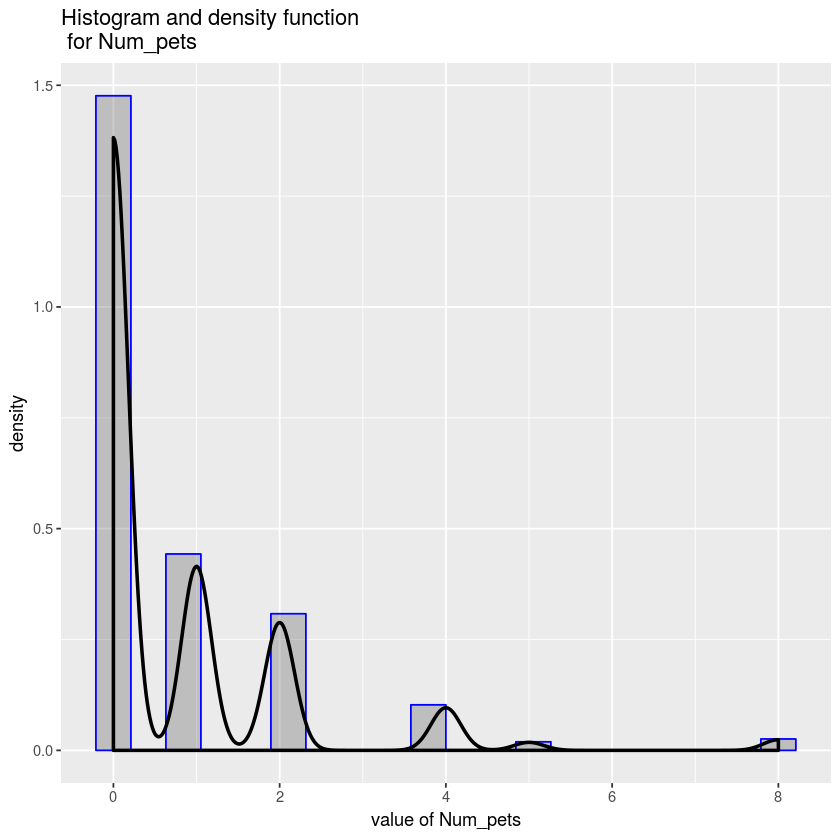

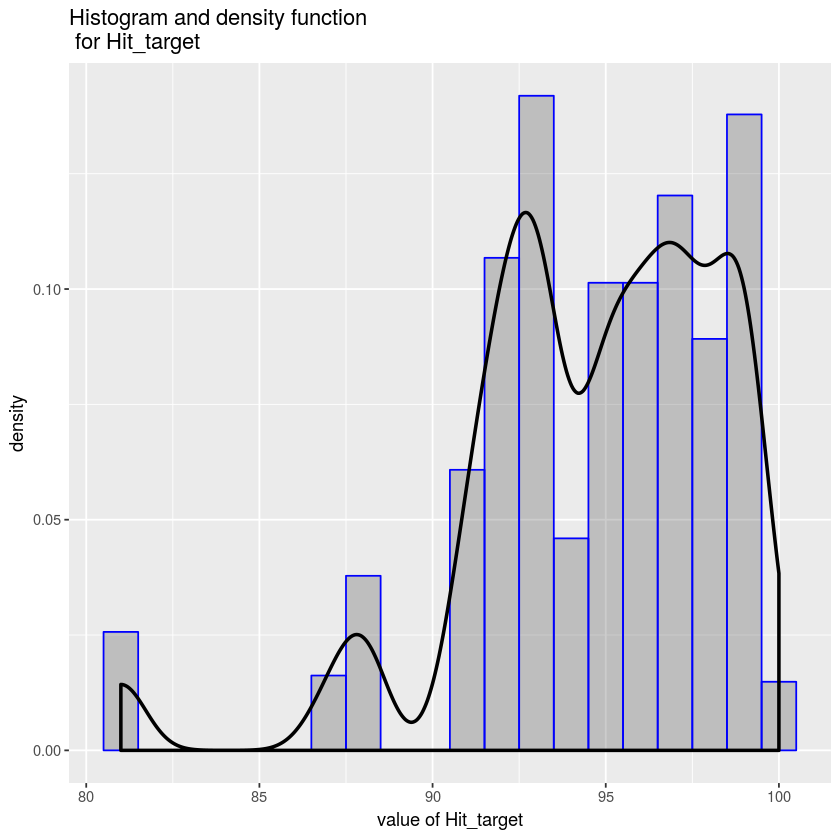

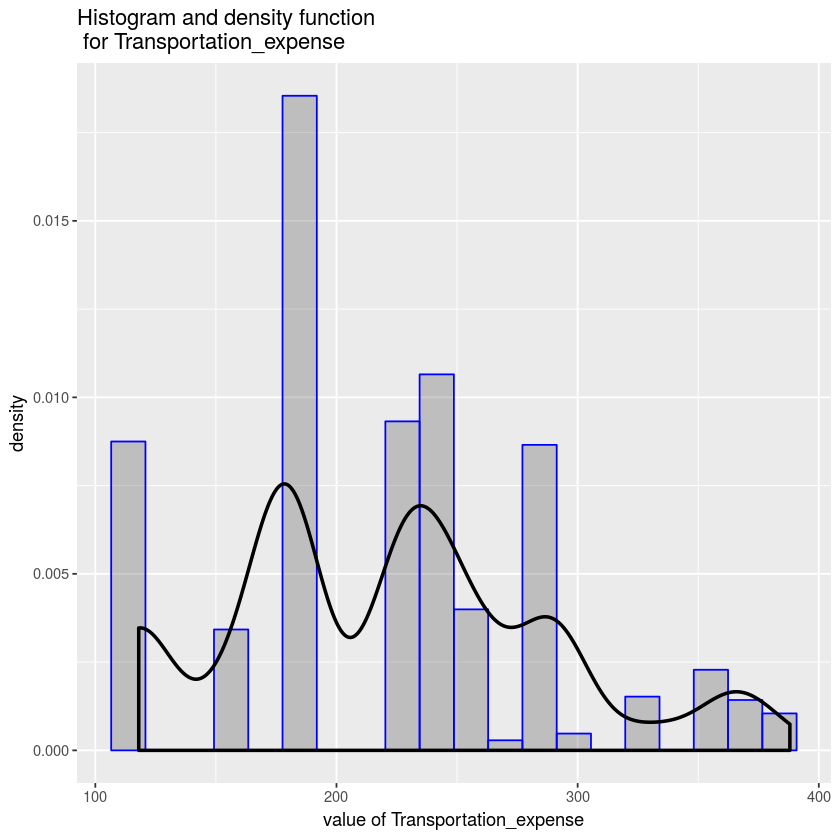

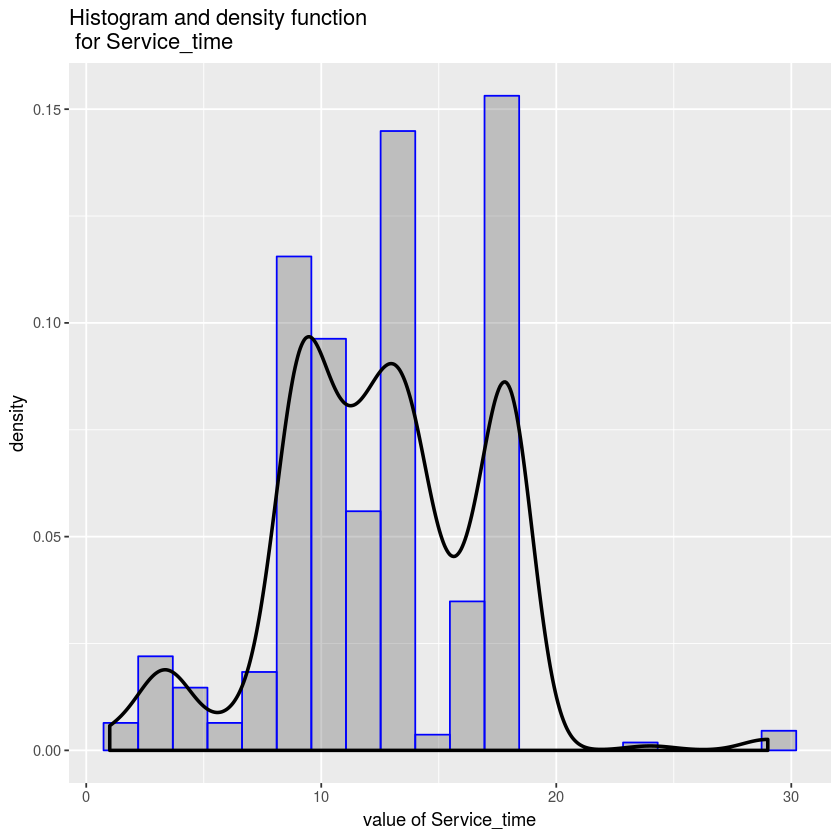

In [10]:
#Loop plot the density of features
plot.hists <- function(col, df, bins = 20){
  p1 <- ggplot(df, aes_string(col)) + 
    geom_histogram(aes(y = ..density..), bins = bins, 
                   alpha = 0.3, color = 'blue') +
    geom_density(size = 1) +
    labs(title=str_c("Histogram and density function \n for ", col), 
         x=str_c("value of ", col))
  
  p1 %>% print()
}

cols <- c('Absenteeism_hours', 'Age', 'Commute_distance','Num_children', 'Num_pets','Hit_target', 'Transportation_expense',
          'Service_time')

cols %>% walk(plot.hists, df)

### Variables Mutation and Normarlization

Observations: 740
Variables: 29
$ PK                         <int> 4, 8, 11, 12, 13, 16, 24, 28, 38, 40, 41...
$ Education                  <ord> High_school, High_school, High_school, H...
$ Reason                     <fct> 7, 23, 1, 1, 11, 14, 28, 28, 11, 23, 23,...
$ Day_of_week                <fct> Thursday, Friday, Monday, Tuesday, Wedne...
$ Seasons                    <fct> Summer, Summer, Summer, Summer, Summer, ...
$ Transportation_expense     <int> 279, 260, 260, 260, 260, 246, 260, 157, ...
$ Service_time               <int> 14, 11, 11, 11, 11, 16, 11, 6, 12, 11, 7...
$ Commute_distance           <int> 5, 50, 50, 50, 50, 25, 50, 27, 50, 50, 4...
$ Age                        <int> 39, 36, 36, 36, 36, 41, 36, 29, 32, 36, ...
$ Hit_target                 <int> 97, 97, 97, 97, 97, 97, 92, 92, 92, 92, ...
$ Disciplinary_failure       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE...
$ Num_children               <int> 2, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 1...
$ Num_pets          

       PK                Education       Reason       Day_of_week    Seasons   
 Min.   :  1.0   High_school  :611   23     :149   Monday   :161   Summer:170  
 1st Qu.:185.8   Undergraduate: 46   28     :112   Tuesday  :154   Autumn:192  
 Median :370.5   Graduate     : 79   27     : 69   Wednesday:156   Winter:183  
 Mean   :370.5   Doctorate    :  4   13     : 55   Thursday :125   Spring:195  
 3rd Qu.:555.2                       0      : 43   Friday   :144               
 Max.   :740.0                       19     : 40                               
                                     (Other):272                               
 Transportation_expense  Service_time   Commute_distance      Age       
 Min.   :118.0          Min.   : 1.00   Min.   : 5.00    Min.   :27.00  
 1st Qu.:179.0          1st Qu.: 9.00   1st Qu.:16.00    1st Qu.:31.00  
 Median :225.0          Median :13.00   Median :26.00    Median :37.00  
 Mean   :221.3          Mean   :12.55   Mean   :29.63    Mean   :36.

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”Warning message:
“Removed 44 rows containing non-finite values (stat_density).”

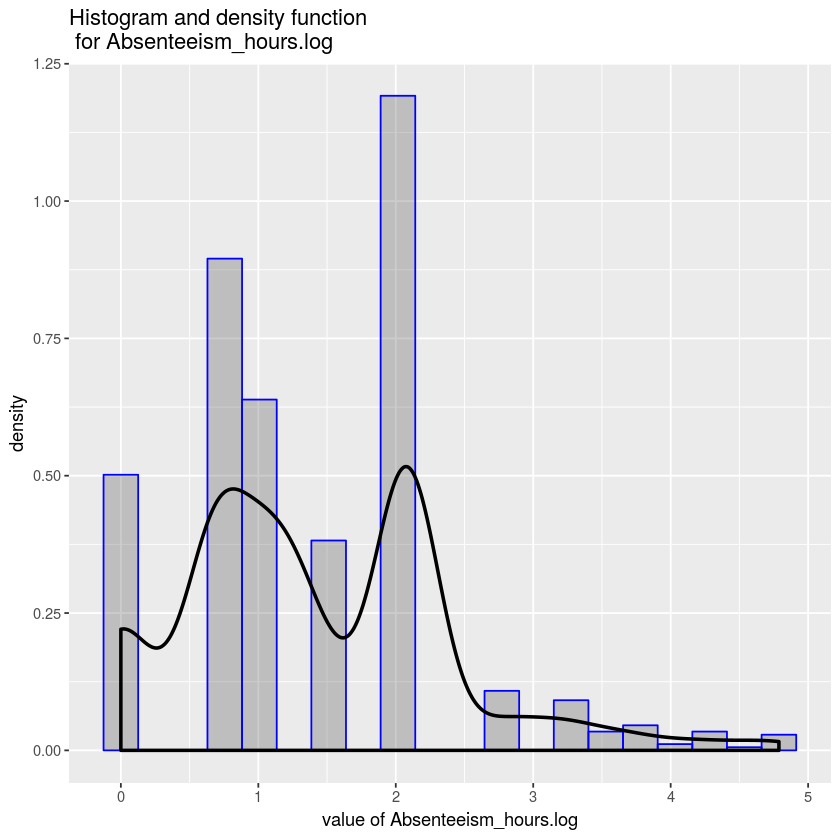

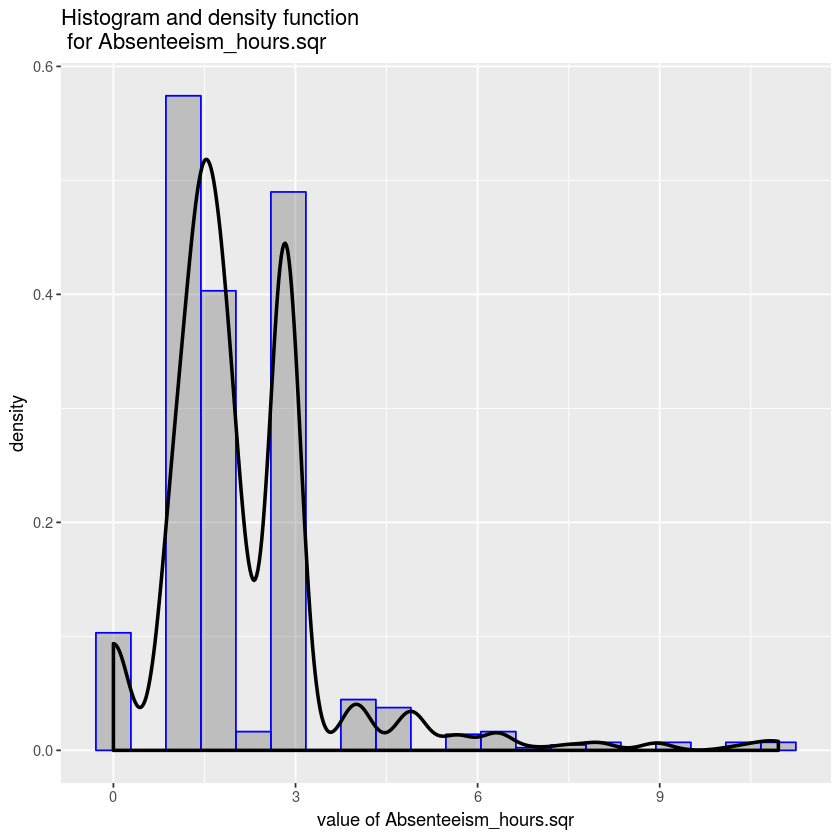

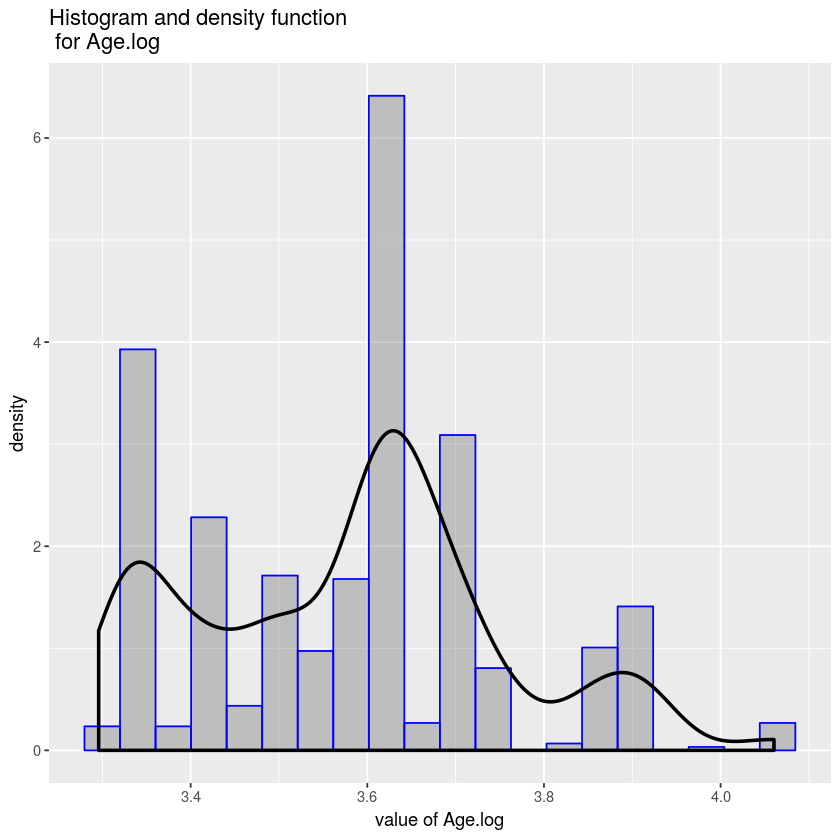

Warning message:
“Removed 298 rows containing non-finite values (stat_bin).”Warning message:
“Removed 298 rows containing non-finite values (stat_density).”

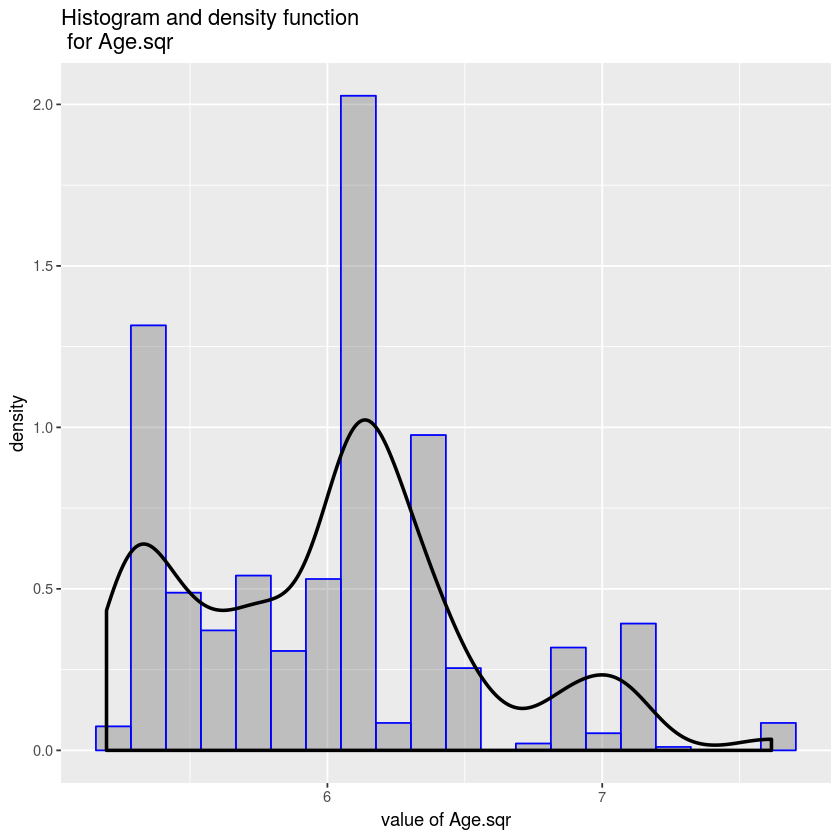

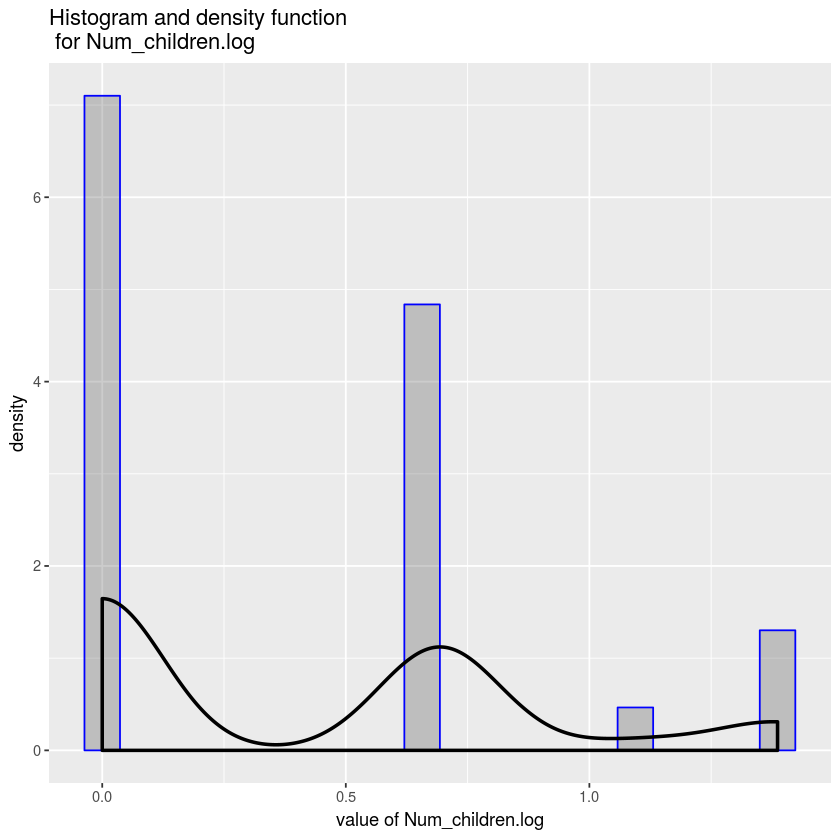

Warning message:
“Removed 460 rows containing non-finite values (stat_bin).”Warning message:
“Removed 460 rows containing non-finite values (stat_density).”

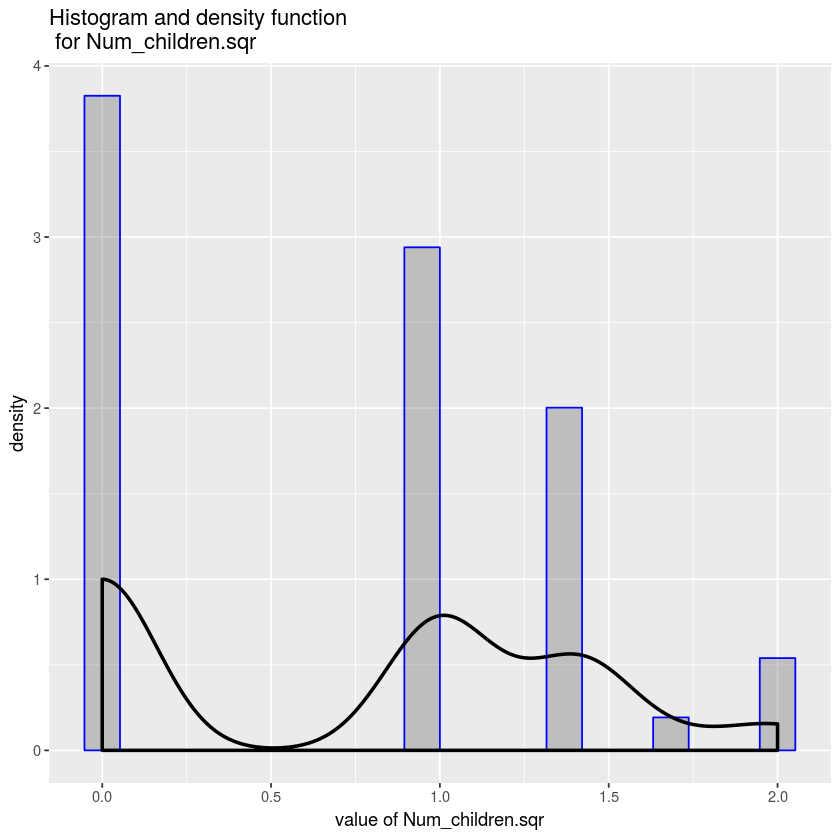

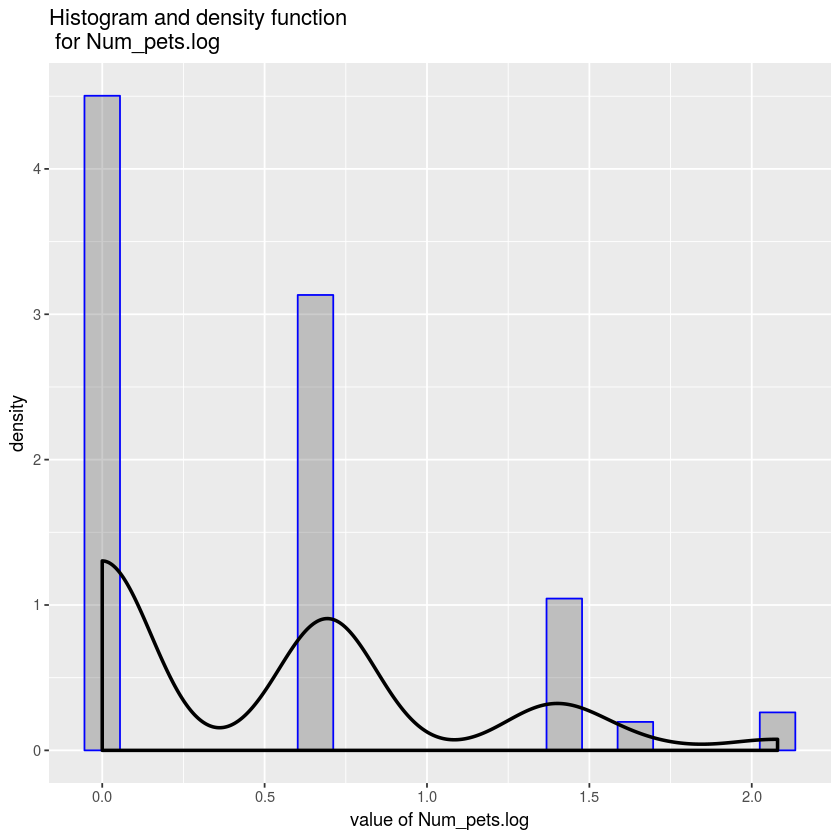

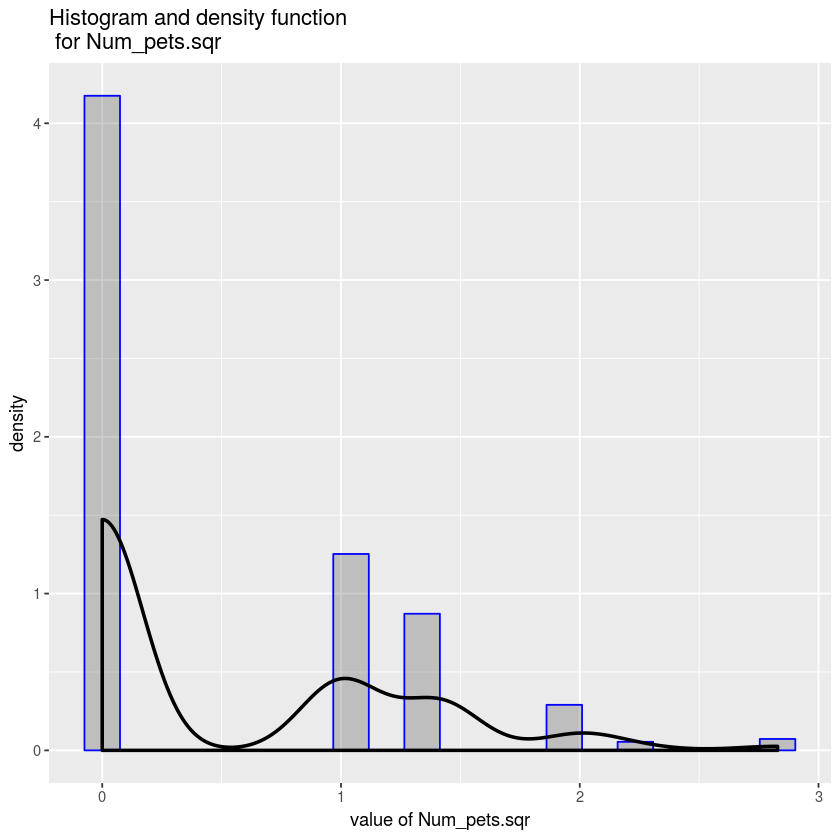

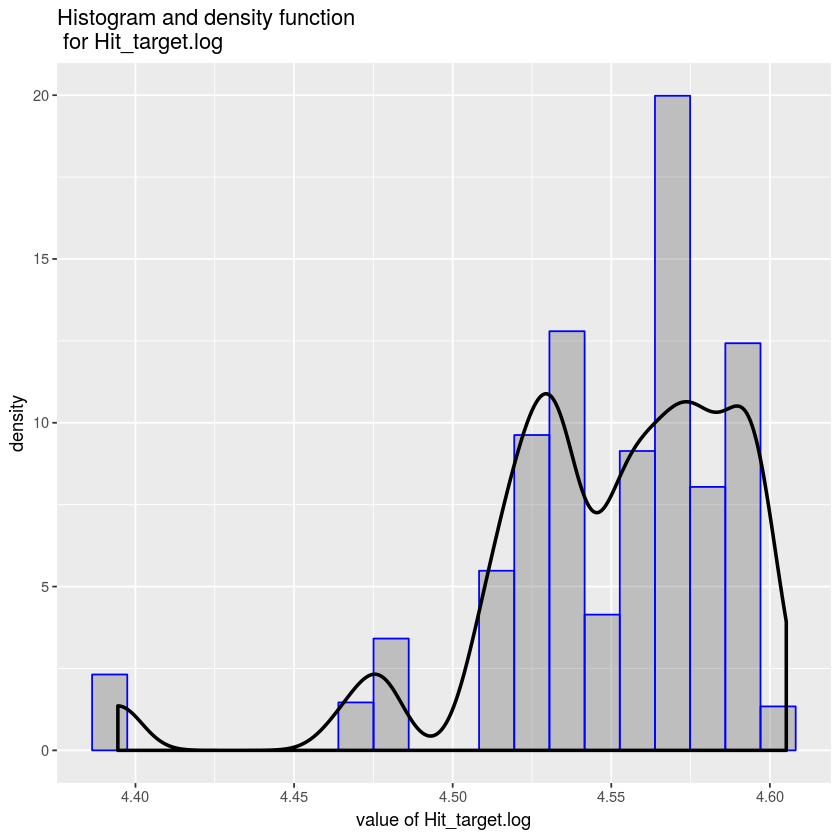

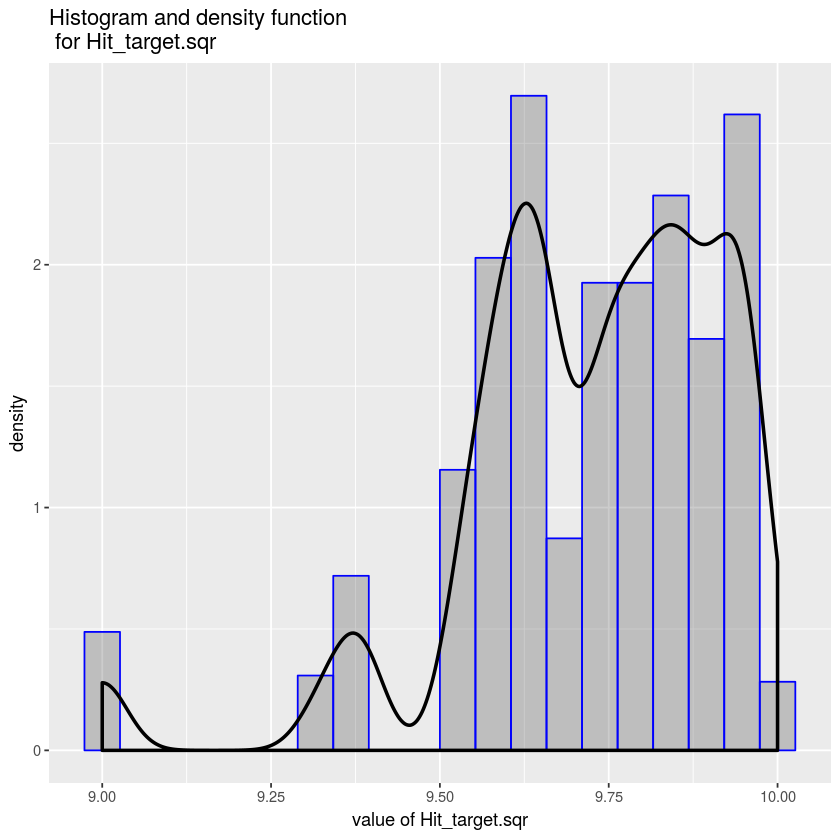

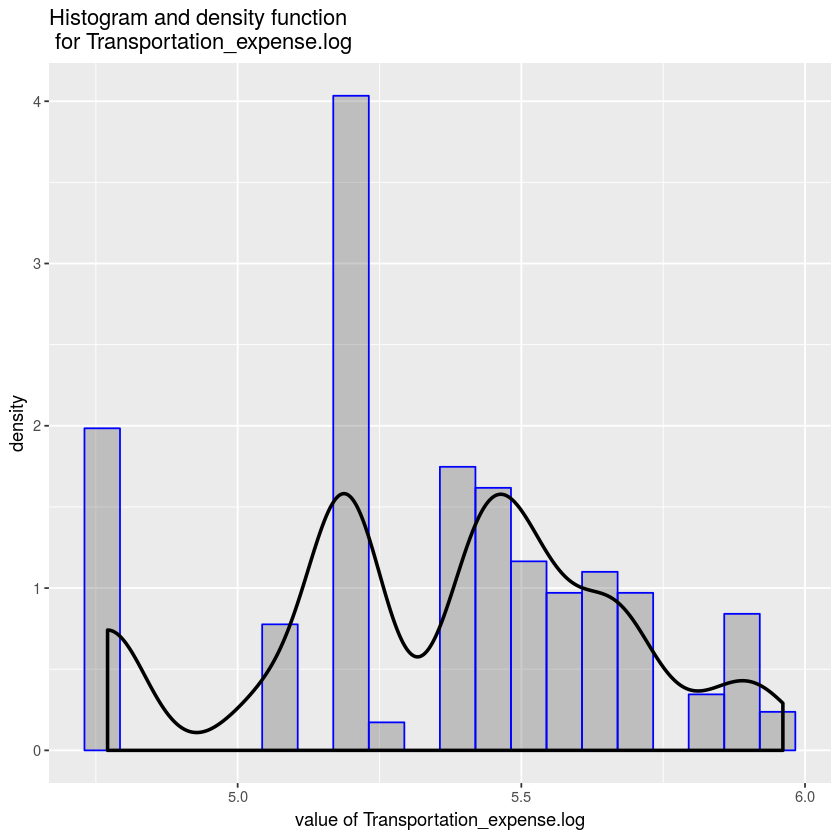

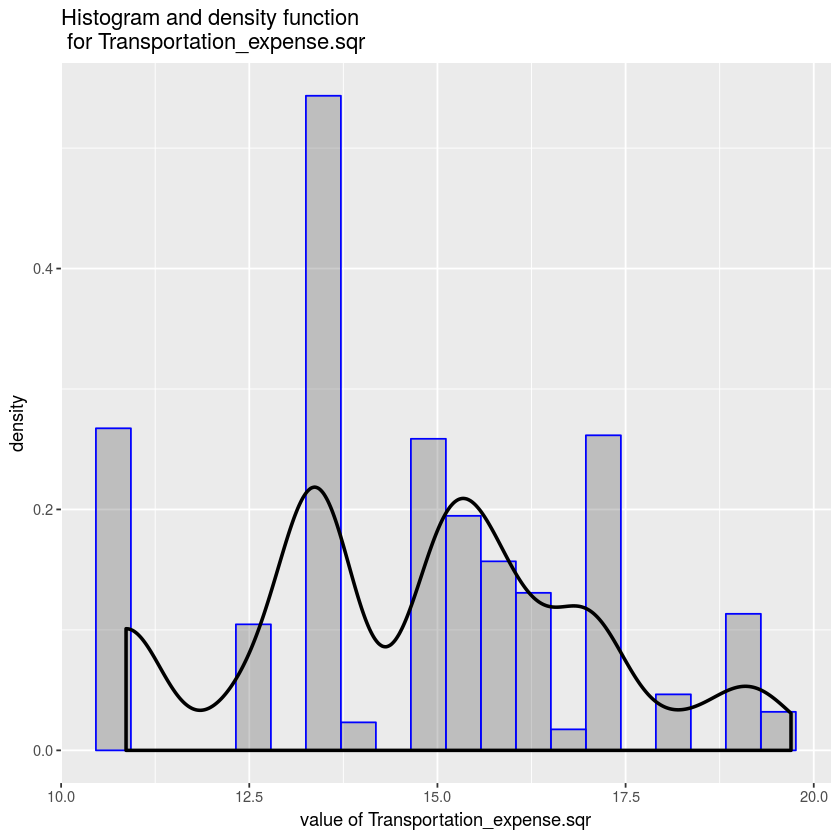

In [11]:
#Update the existing data frame
 df_mutate <- df%>% 
   mutate(Absenteeism_hours.log = log(Absenteeism_hours),
         Absenteeism_hours.sqr = sqrt(Absenteeism_hours),
         Age.log=log(Age),
         Age.sqr=sqrt(Age),
         Hit_target.log=log(Hit_target),
         Hit_target.sqr=sqrt(Hit_target),
         Num_children.log=log(Num_children),
         Num_children.sqr=sqrt(Num_children),
         Num_pets.log=log(Num_pets),
         Num_pets.sqr=sqrt(Num_pets),
         Transportation_expense.log=log(Transportation_expense),
         Transportation_expense.sqr=sqrt(Transportation_expense))

df_mutate %>% glimpse() %>% summary()

cols <- c("Absenteeism_hours.log", "Absenteeism_hours.sqr", "Age.log", "Age.sqr", "Num_children.log", "Num_children.sqr", 
          "Num_pets.log", "Num_pets.sqr", "Hit_target.log","Hit_target.sqr", "Transportation_expense.log", 
          "Transportation_expense.sqr")

cols %>% walk(plot.hists, df=df_mutate)


#### Compared with the above groups of charts, Absenteeism_hours.sqr is more symmetric than Absenteeism_hours, so we will use Absenteeism_hours.sqr as our label. Others variables do not have significant changes after mutatation so we will try modeling with the different variations.

In [12]:
# normalize function
normalize <- function(x) (x - mean(x))/sd(x)

# normalized dataframe
df_mutate_norm <- df_mutate %>% 
  mutate(Age = normalize(Age),
         Age.log = normalize(Age.log), 
         Num_children = normalize(Num_children),
         Num_pets = normalize(Num_pets),
         Num_pets.sqr = normalize(Num_pets.sqr), 
         Hit_target = normalize(Hit_target),
         Hit_target.log = normalize(Hit_target.log),
         Hit_target.sqr = normalize(Hit_target.sqr),
         Commute_distance = normalize(Commute_distance),
         Transportation_expense=normalize(Transportation_expense),
         Transportation_expense.log = normalize(Transportation_expense.log), 
         Transportation_expense.sqr = normalize(Transportation_expense.sqr),
         Service_time=normalize(Service_time)) %>%  
    select(-PK, -Age.sqr, -Num_pets.log, -Num_children.log, -Num_children.sqr, -Absenteeism_hours.log)

df_mutate_norm %>% glimpse()

Observations: 740
Variables: 23
$ Education                  <ord> High_school, High_school, High_school, H...
$ Reason                     <fct> 7, 23, 1, 1, 11, 14, 28, 28, 11, 23, 23,...
$ Day_of_week                <fct> Thursday, Friday, Monday, Tuesday, Wedne...
$ Seasons                    <fct> Summer, Summer, Summer, Summer, Summer, ...
$ Transportation_expense     <dbl> 0.86136453, 0.57758008, 0.57758008, 0.57...
$ Service_time               <dbl> 0.3297577, -0.3544125, -0.3544125, -0.35...
$ Commute_distance           <dbl> -1.6601356, 1.3728658, 1.3728658, 1.3728...
$ Age                        <dbl> 0.3935931, -0.0694576, -0.0694576, -0.06...
$ Hit_target                 <dbl> 0.6382541, 0.6382541, 0.6382541, 0.63825...
$ Disciplinary_failure       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE...
$ Num_children               <dbl> 0.89311870, 2.71380144, 2.71380144, 2.71...
$ Num_pets                   <dbl> -0.5658572, -0.5658572, -0.5658572, -0.5...
$ Social_drinker    

# Split the training and testing set

In [13]:
set.seed(2345) 

df_train <- df_mutate_norm %>% sample_frac(0.8)

df_test <- df_mutate_norm %>% setdiff(df_train)
                      
df_train %>% glimpse()
df_test %>% glimpse()

Observations: 592
Variables: 23
$ Education                  <ord> High_school, High_school, High_school, U...
$ Reason                     <fct> 19, 0, 23, 21, 28, 7, 18, 23, 27, 0, 1, ...
$ Day_of_week                <fct> Wednesday, Thursday, Wednesday, Thursday...
$ Seasons                    <fct> Winter, Winter, Spring, Spring, Summer, ...
$ Transportation_expense     <dbl> 2.34003089, 0.36847574, -0.63223785, -0....
$ Service_time               <dbl> -0.3544125, 0.7858713, 1.2419848, 1.0139...
$ Commute_distance           <dbl> 1.30546573, -0.31213501, 1.44026580, -0....
$ Age                        <dbl> -0.06945760, 0.70229353, 0.23924285, 0.5...
$ Hit_target                 <dbl> 0.3736558, 0.9028525, -0.6847376, -0.420...
$ Disciplinary_failure       <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE,...
$ Num_children               <dbl> 0.89311870, -0.92756405, -0.92756405, 0....
$ Num_pets                   <dbl> 2.4684495, -0.5658572, -0.5658572, -0.56...
$ Social_drinker    

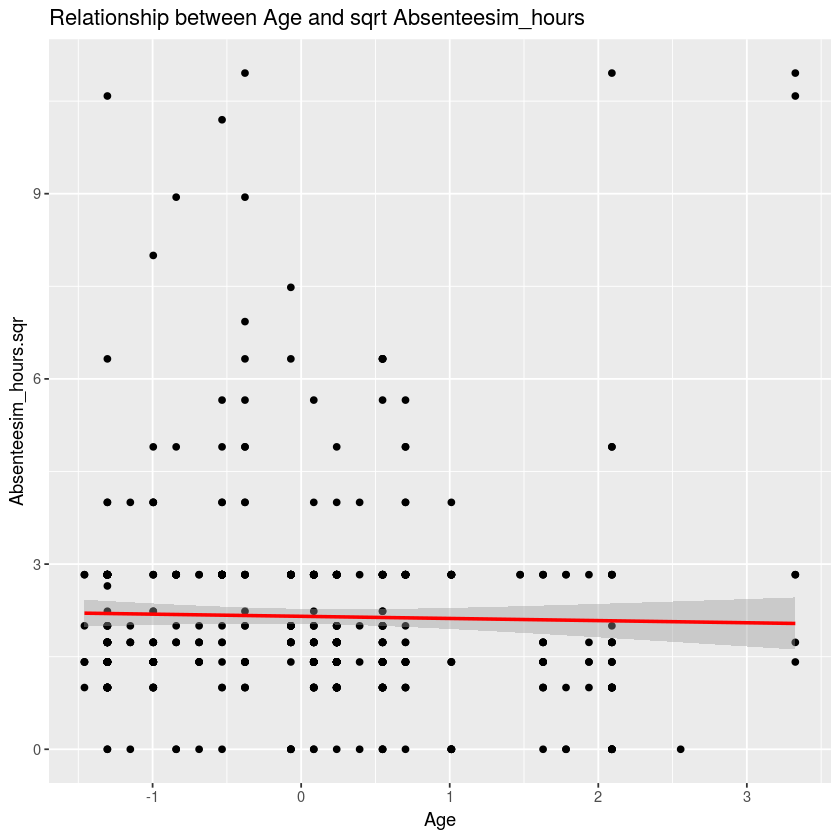

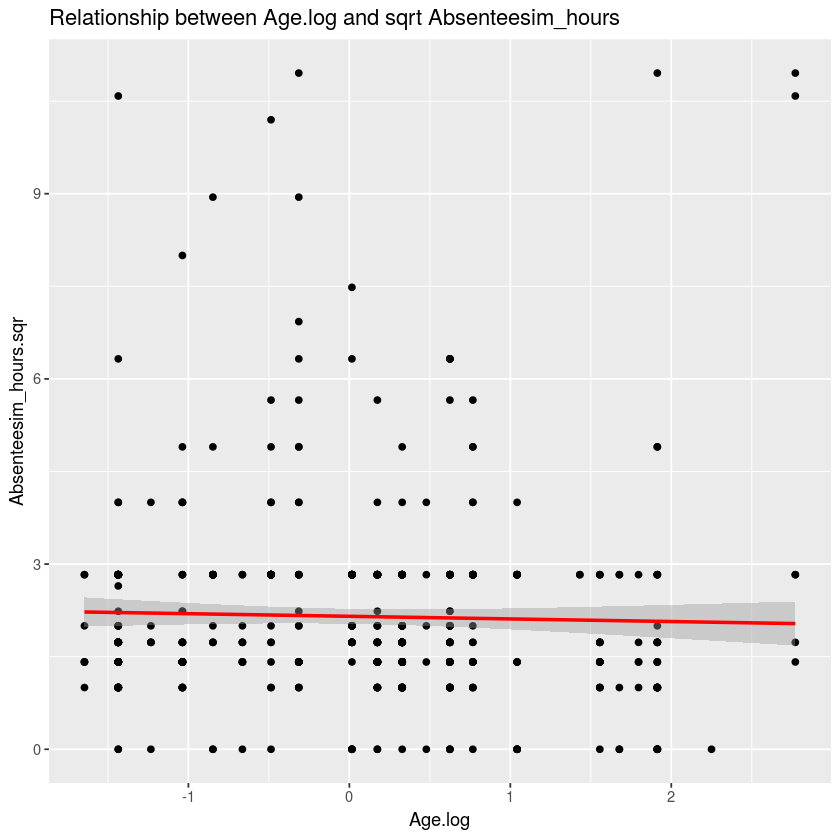

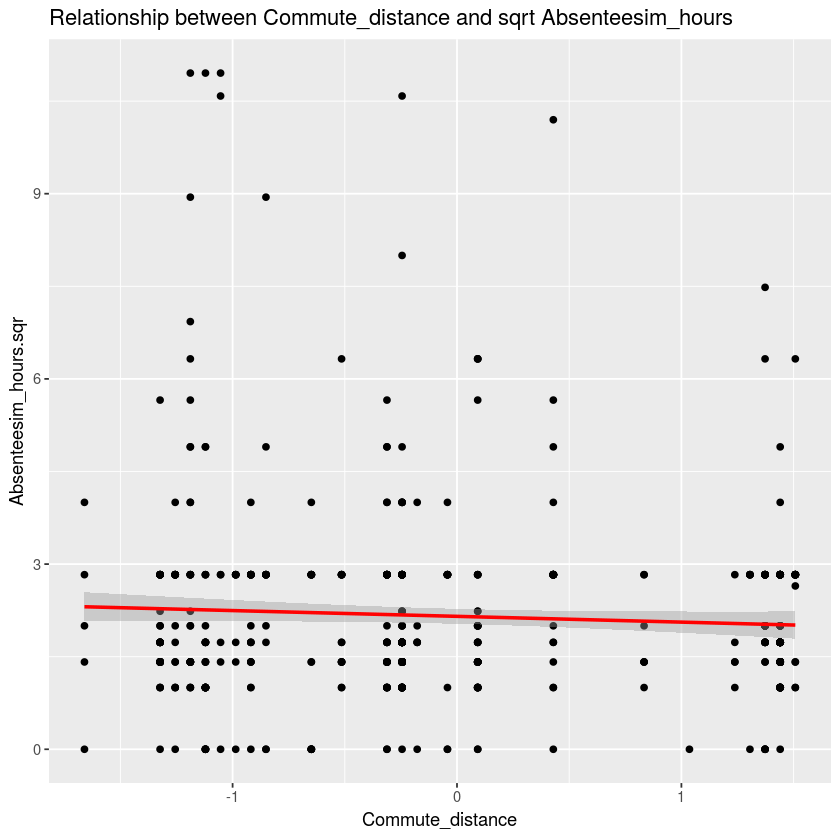

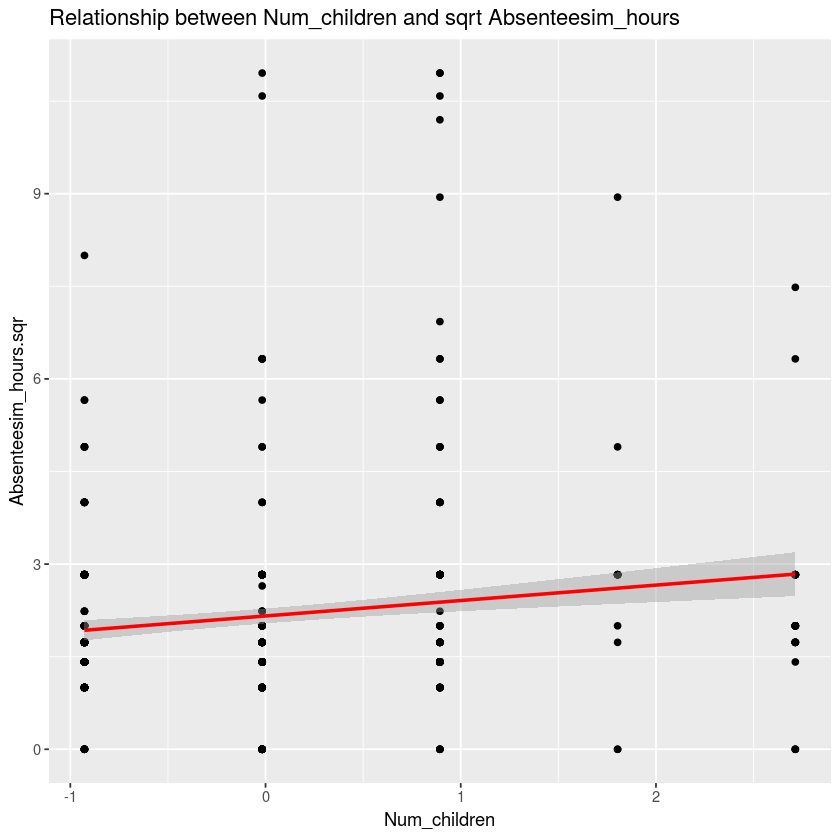

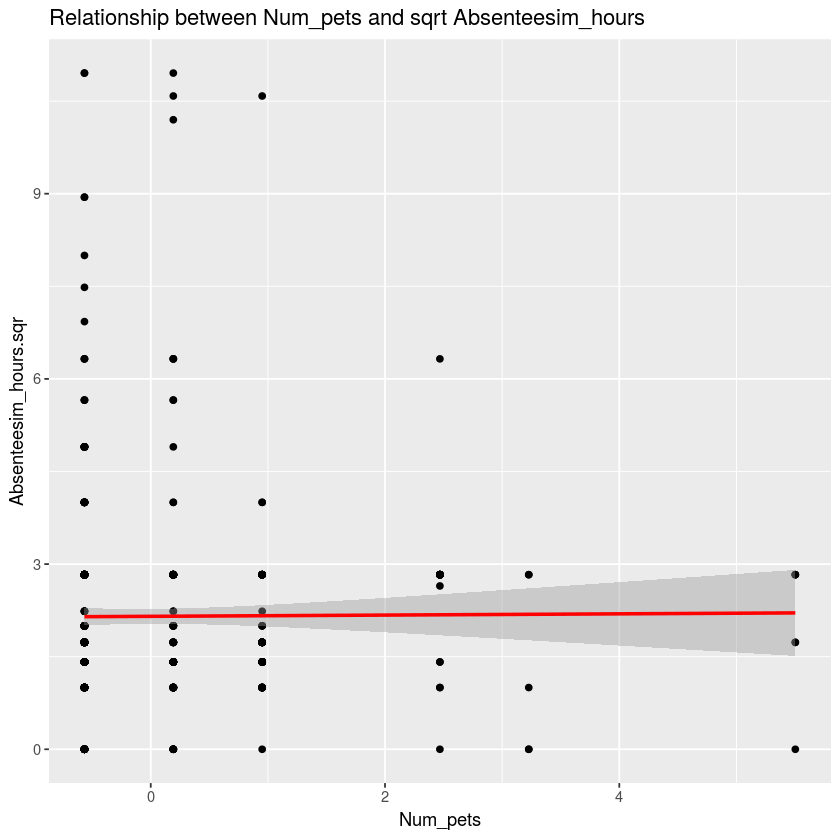

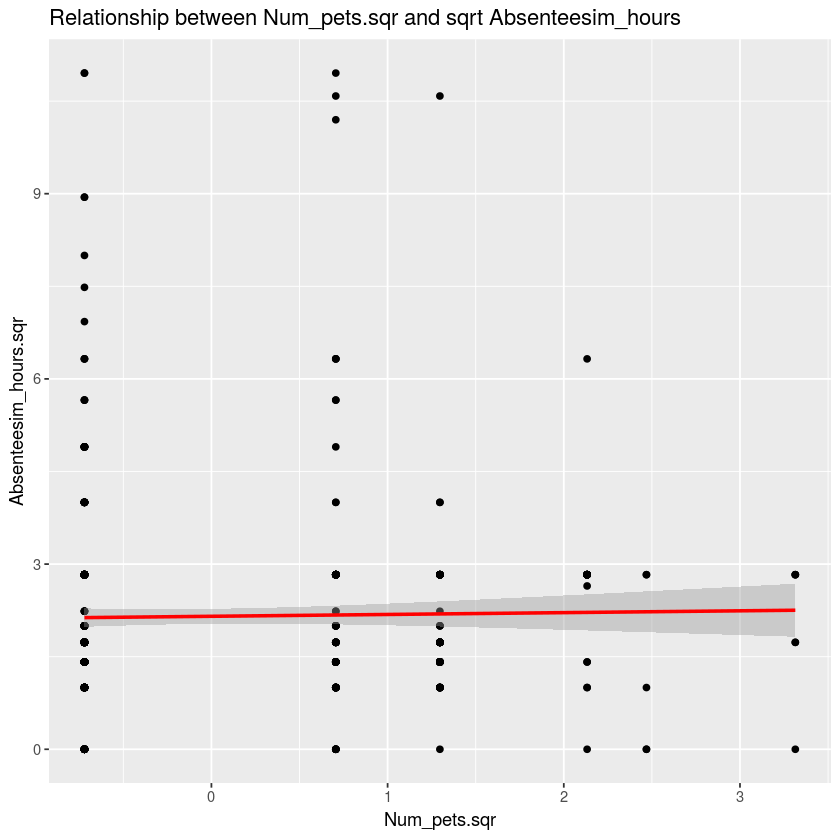

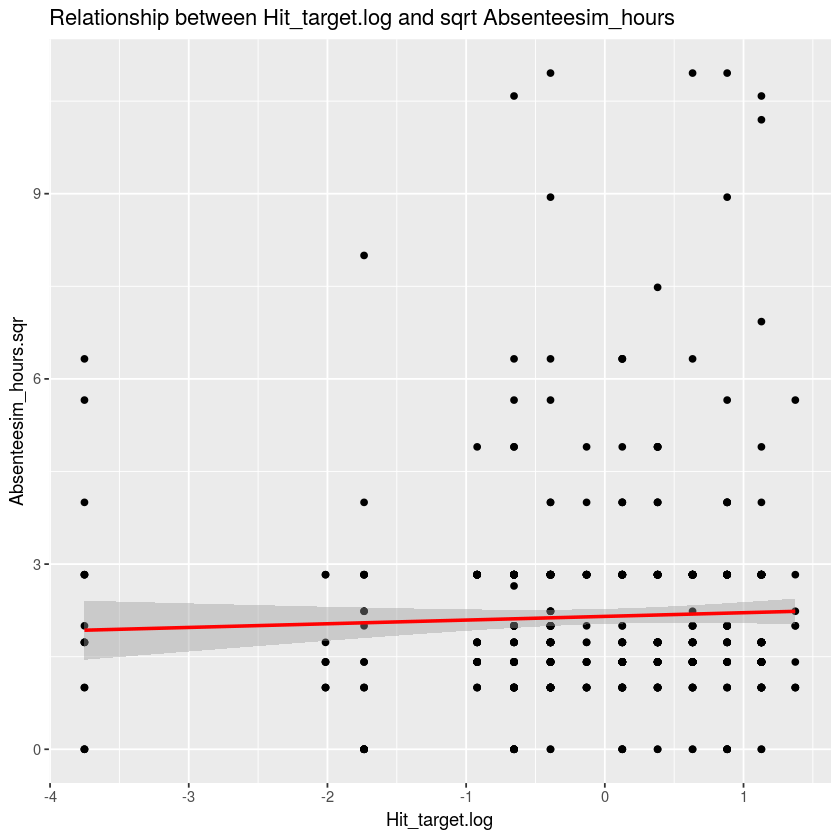

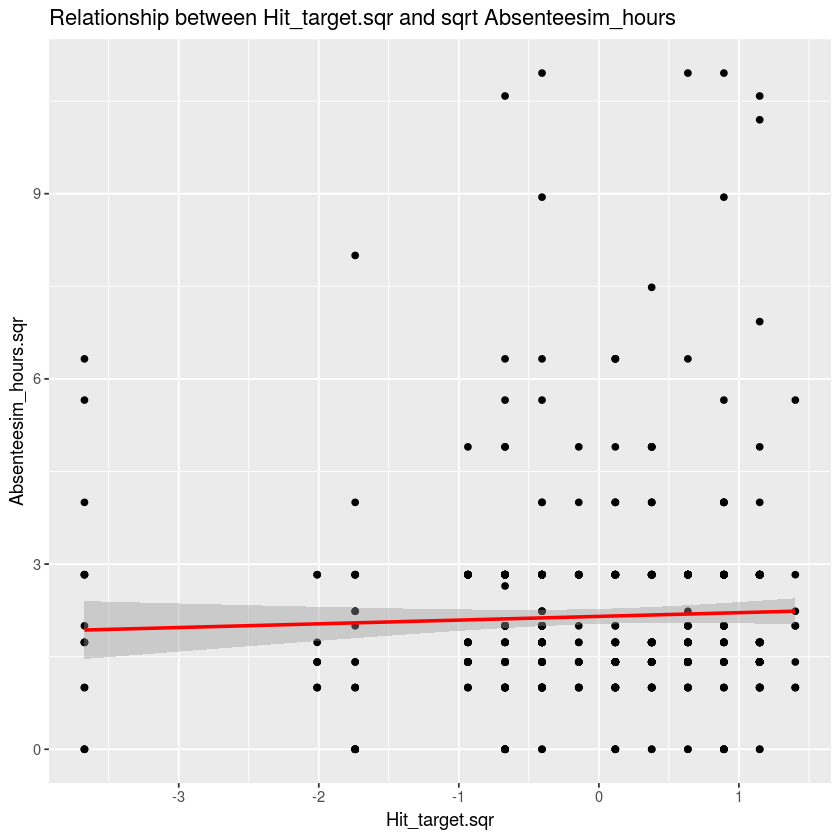

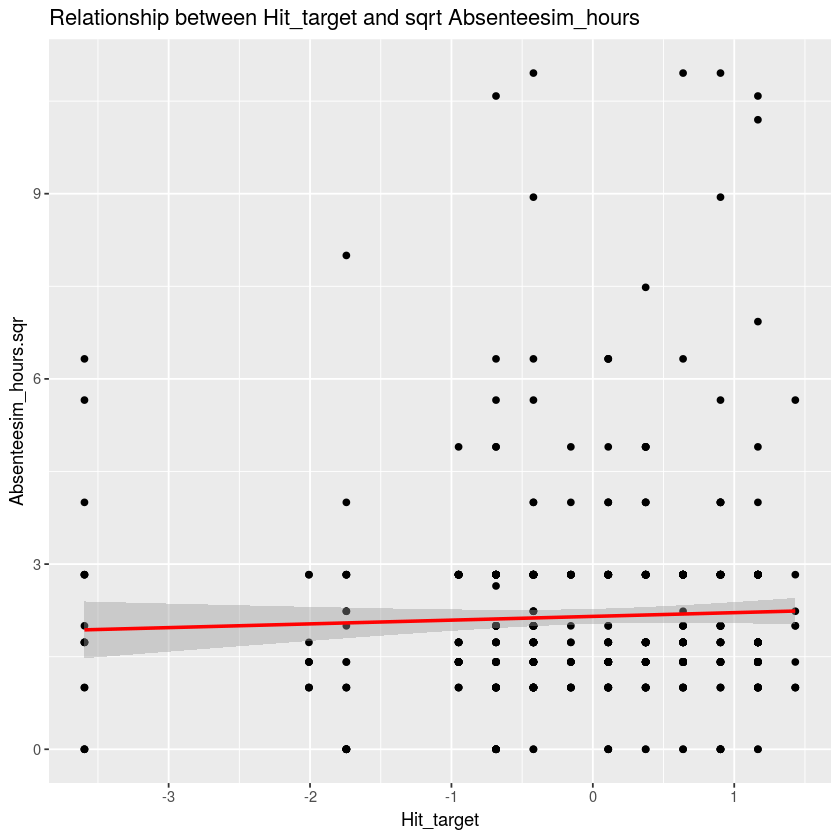

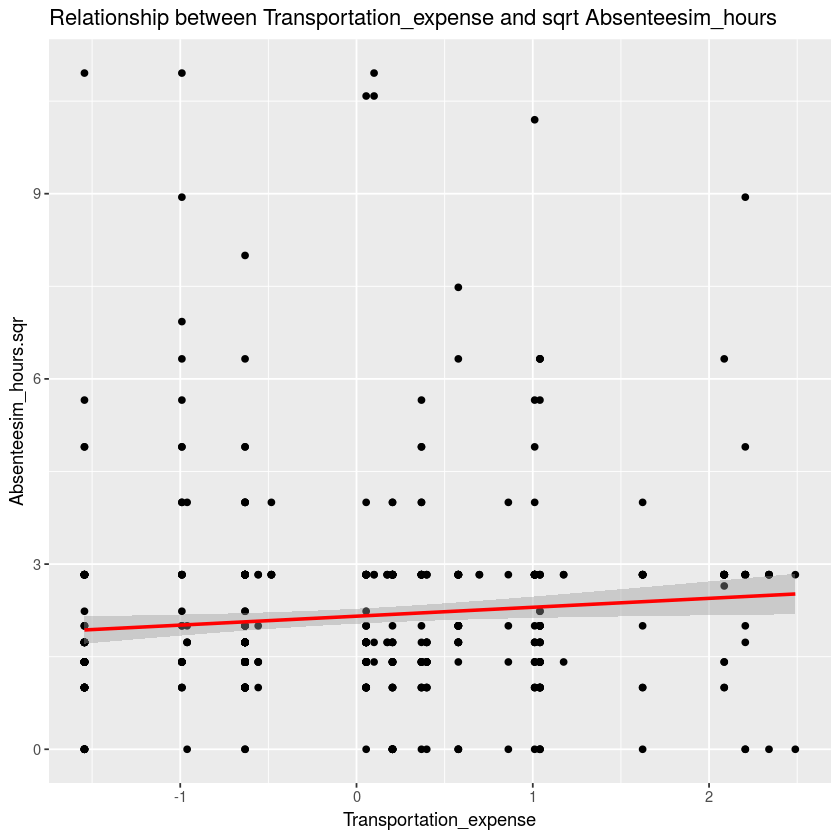

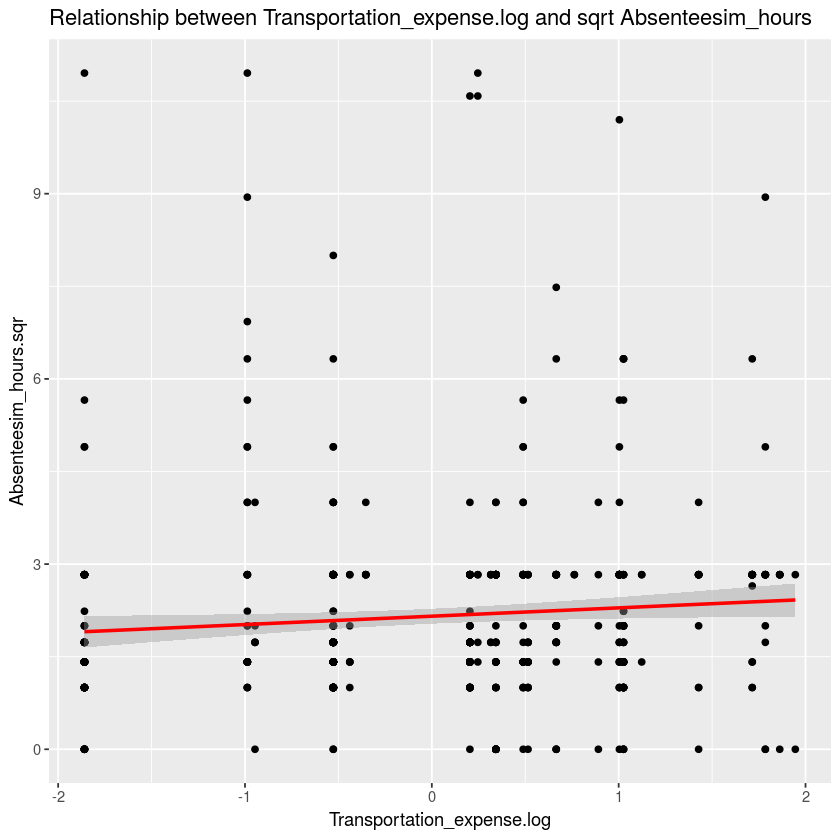

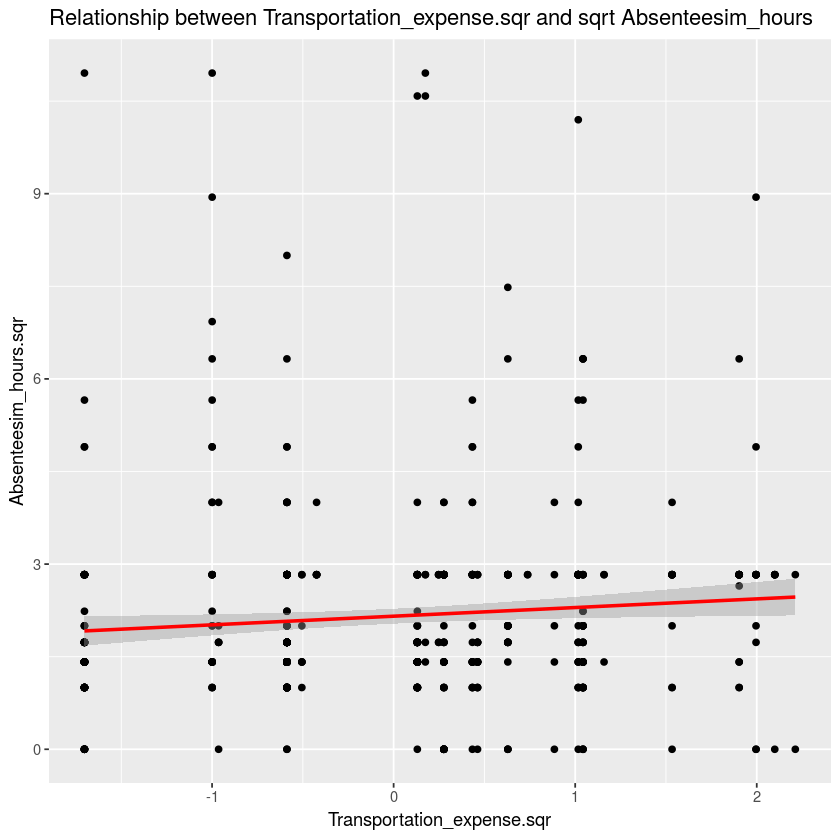

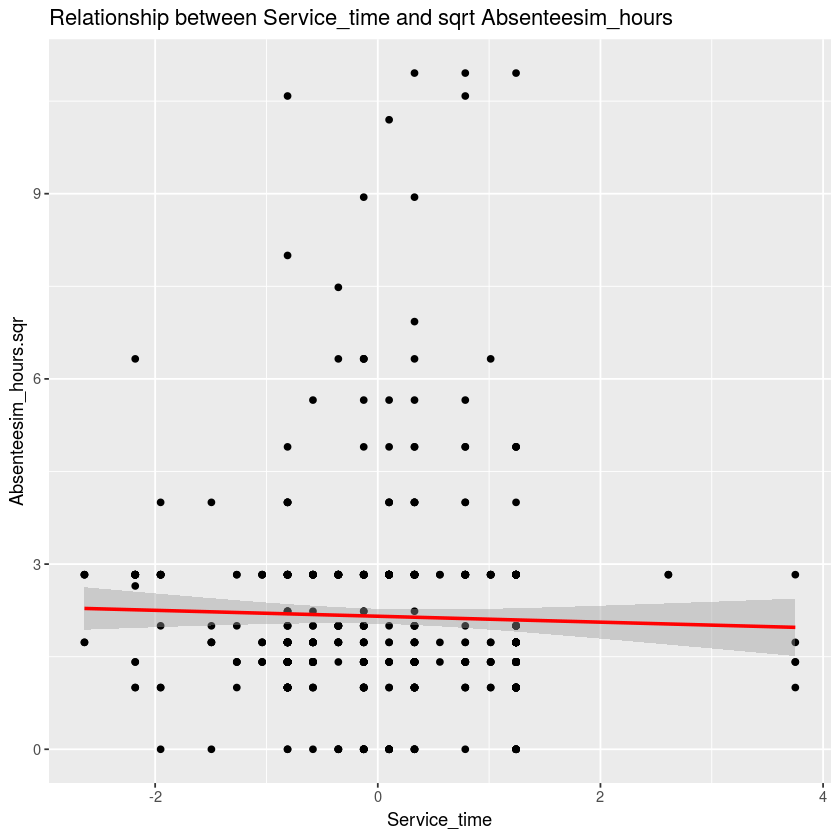

In [14]:
#plot features
plot.feature = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'Absenteeism_hours.sqr')) + 
    geom_point() + 
    geom_smooth(size = 1, color = 'red', method="lm") + 
    labs(title=str_c("Relationship between ", col, " and sqrt Absenteesim_hours"),
         x=col, y="Absenteesim_hours.sqr")
  
  p1 %>% print()
}

cols = c('Age', 'Age.log', 'Commute_distance','Num_children','Num_pets', 'Num_pets.sqr', "Hit_target.log","Hit_target.sqr", 
         'Hit_target', 'Transportation_expense', 'Transportation_expense.log', 'Transportation_expense.sqr', 'Service_time')

cols %>% walk(plot.feature, df_train)

# Train the model with training set

# Model 1

In [15]:
model_1<- lm(Absenteeism_hours.sqr ~ Commute_distance+Num_children+Transportation_expense+Transportation_expense.log+
             Transportation_expense.sqr, data=df_train) 
model_1%>%summary


Call:
lm(formula = Absenteeism_hours.sqr ~ Commute_distance + Num_children + 
    Transportation_expense + Transportation_expense.log + Transportation_expense.sqr, 
    data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1933 -0.7614 -0.3385  0.5429  8.9331 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  2.15833    0.06107  35.341  < 2e-16 ***
Commute_distance            -0.16740    0.07055  -2.373  0.01798 *  
Num_children                 0.23603    0.06774   3.485  0.00053 ***
Transportation_expense      14.69546    6.71927   2.187  0.02913 *  
Transportation_expense.log  14.54706    6.71939   2.165  0.03080 *  
Transportation_expense.sqr -29.01346   13.35915  -2.172  0.03027 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.485 on 586 degrees of freedom
Multiple R-squared:  0.04149,	Adjusted R-squared:  0.03331 
F-statistic: 5.073 on 5 and 586 DF, 

# Model 2

In [16]:
model_2<- lm(Absenteeism_hours.sqr ~ Num_children, data=df_train) 
model_2%>%summary


Call:
lm(formula = Absenteeism_hours.sqr ~ Num_children, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8379 -0.7412 -0.1958  0.6731  8.7991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.15968    0.06133  35.216  < 2e-16 ***
Num_children  0.24990    0.06225   4.015 6.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.492 on 590 degrees of freedom
Multiple R-squared:  0.02659,	Adjusted R-squared:  0.02494 
F-statistic: 16.12 on 1 and 590 DF,  p-value: 6.72e-05


# Model Performance Comparison

Absenteeism_hours,score,resids,predicted.Absenteeism
4,2.495714,-0.49571419,6.228589
4,2.495714,-0.49571419,6.228589
1,2.070591,-1.07059101,4.287347
16,2.495714,1.50428581,6.228589
1,2.175632,-1.17563165,4.733373
3,2.175632,-0.44358084,4.733373
2,2.175632,-0.76141808,4.733373
8,2.797205,0.03122225,7.824355
2,2.175632,-0.76141808,4.733373
2,2.175632,-0.76141808,4.733373


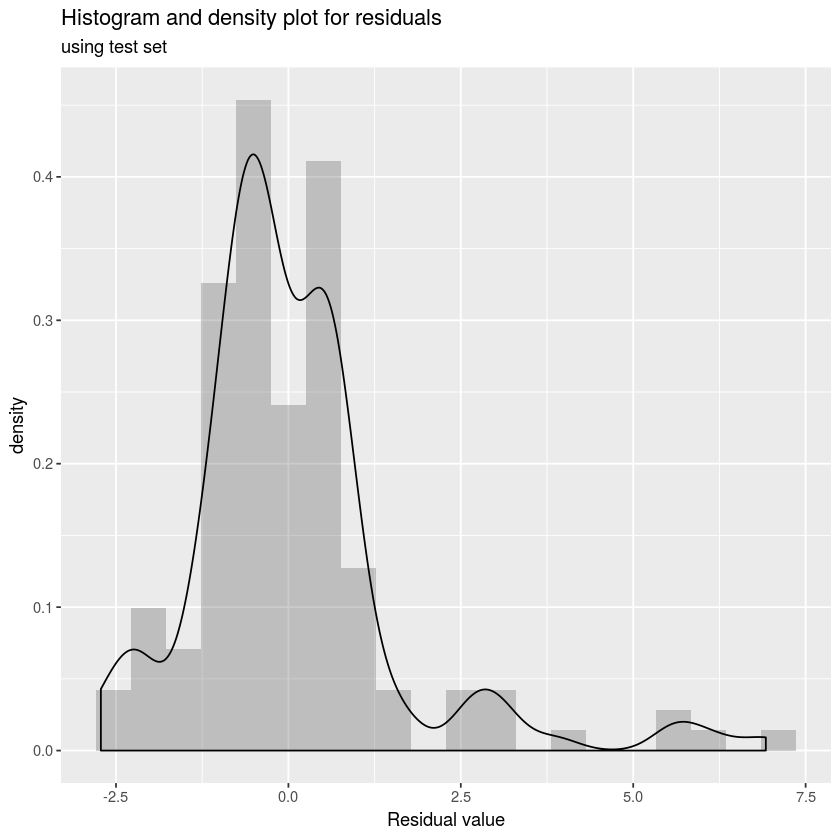

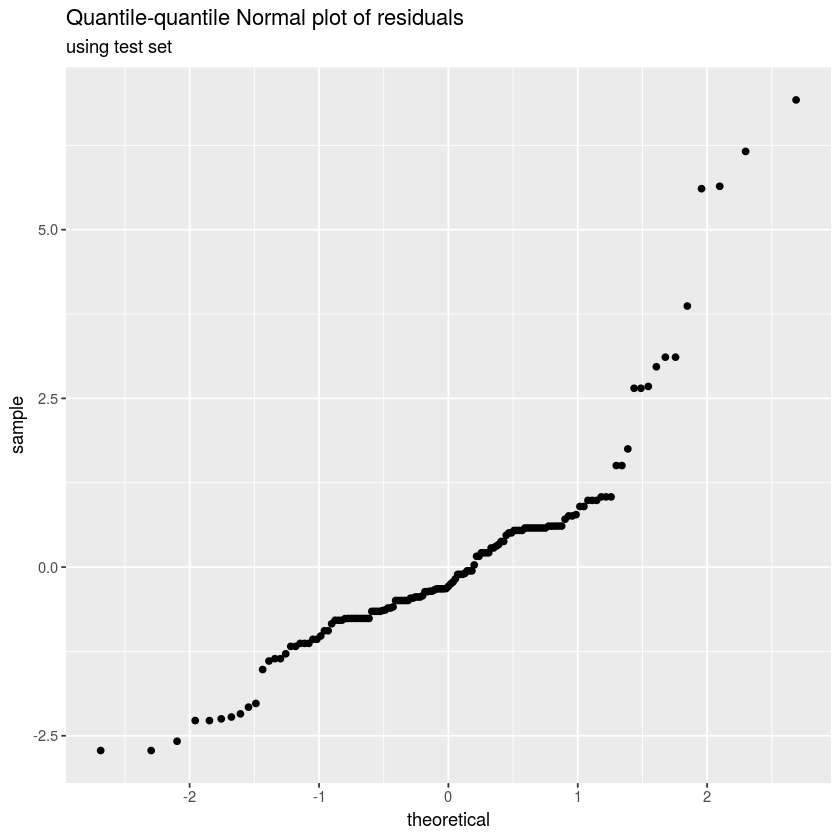

(Intercept)           Commute_distance 
                 2.1583328                 -0.1674012 
              Num_children     Transportation_expense 
                 0.2360331                 14.6954603 
Transportation_expense.log Transportation_expense.sqr 
                14.5470597                -29.0134594

Absenteeism_hours,score,resids,predicted.Absenteeism
4,2.837862,-0.837862322,8.053463
4,2.837862,-0.837862322,8.053463
1,1.927877,-0.927877193,3.716710
16,2.837862,1.162137678,8.053463
1,2.155373,-1.155373475,4.645635
3,2.155373,-0.423322667,4.645635
2,2.155373,-0.741159913,4.645635
8,1.927877,0.900549932,3.716710
2,2.155373,-0.741159913,4.645635
2,2.155373,-0.741159913,4.645635


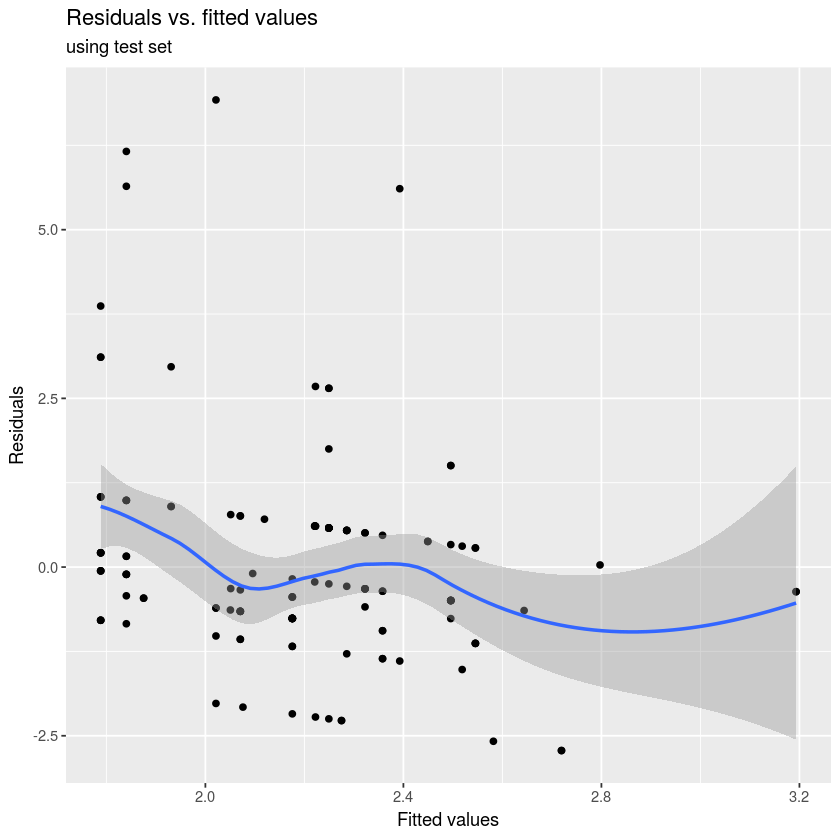

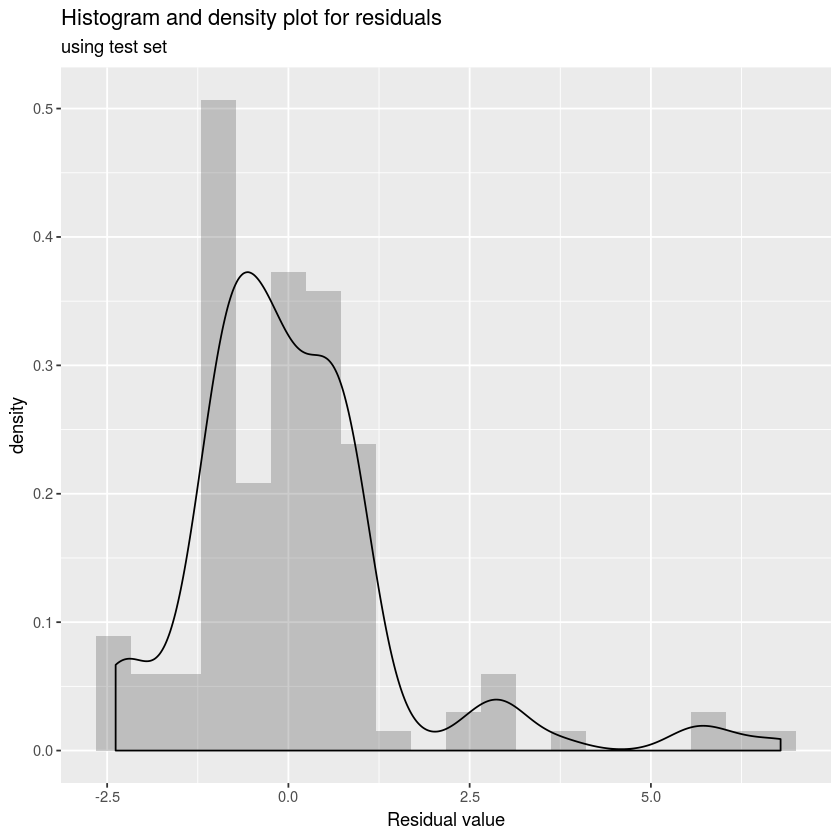

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.9233”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.45954”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.0997e-17”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.051755”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 1.9233”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.45954”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata

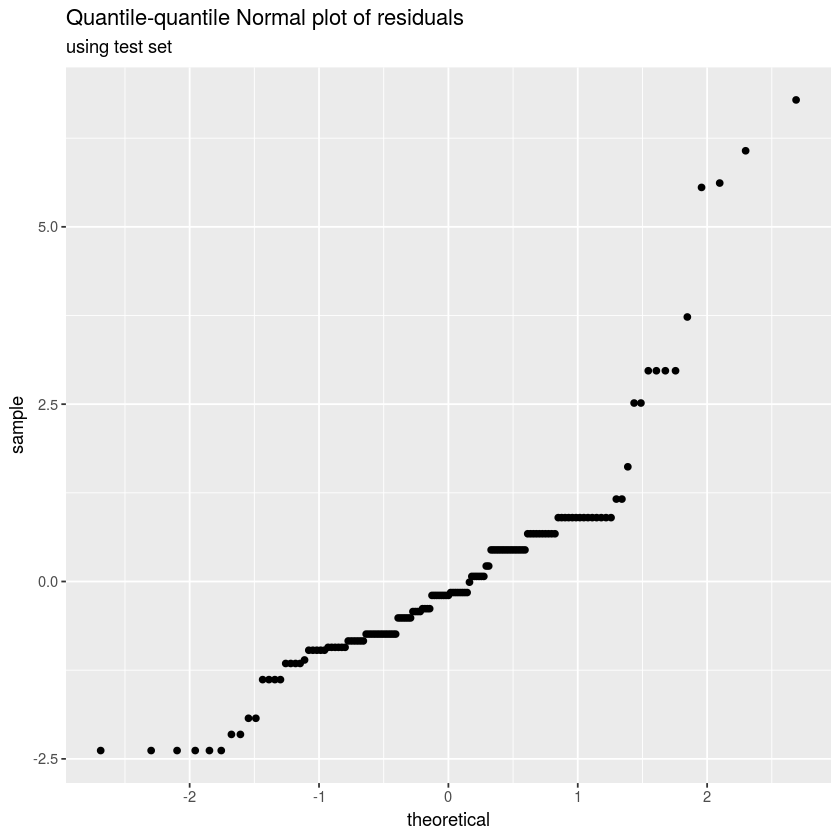

(Intercept) Num_children 
   2.1596775    0.2499022

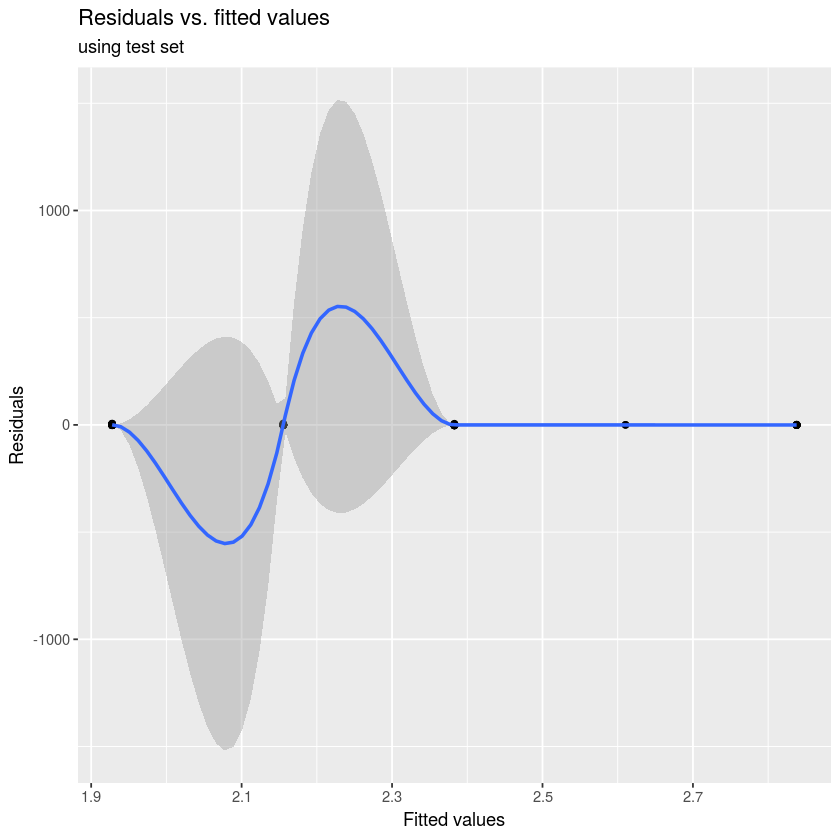

In [17]:
#predict function
predict_score <- function(mod, data){
  data %>%
    mutate(score = predict(mod, newdata=data),
           resids=Absenteeism_hours.sqr - score,
           predicted.Absenteeism = (score*score))
}

#plot residuals function
resids_plot <- function(data){
  hd <- data %>% ggplot(aes(resids, ..density..))+
    geom_histogram(bins=20, alpha=0.3)+
    geom_density()+
    labs(title="Histogram and density plot for residuals", x="Residual value", subtitle="using test set")
  qq <- data %>% ggplot(aes(sample=resids))+
    geom_qq()+
    labs(title="Quantile-quantile Normal plot of residuals", subtitle="using test set")
  scat <- data %>% ggplot(aes(score, resids))+
    geom_point()+
    geom_smooth(method="loess")+
    labs(title="Residuals vs. fitted values", x="Fitted values", y="Residuals", subtitle="using test set")
  hd %>% print()
  qq %>% print()
  scat %>% print()
}

#model 1 performance
df_test_predict1 <- predict_score(model_1, df_test)
df_test_predict1 %>% select(Absenteeism_hours, score, resids, predicted.Absenteeism) %>% return()

df_test_predict1 %>% resids_plot()

model_1$coef

#model 2 performance
df_test_predict2 <- predict_score(model_2, df_test)
df_test_predict2 %>% select(Absenteeism_hours, score, resids, predicted.Absenteeism) %>% return()

df_test_predict2 %>% resids_plot()

model_2$coef

# Analysis and Conclusions
Just doing a basic visual analysis to determine potential features with Absenteeism_hours, it appears that there are trends with Education, BMI, Commute_distance, Age, Hit_target, Num_children, Num_pets, Transportation_expense, Service_time, Social_drinker, and Social_smoker.

Chart 1 does a slightly deeper dive and compares Age and BMI_status to Absenteeism_hours. The data indicates that as someone of a normal BMI_status ages, they are likely to miss more work. Conversely, those that are overweight or obese, tend to miss less work as they age.

The second group of charts shows the relationship that Day_of_week and Seasons has on Absenteeism_hours. Mondays have the highest total absenteesim while Thursdays have the lowest. Companies should get prepared to have the most absences on Mondays, and maybe arrange more team work on Thursday. Winter has the highest absenteesim hours, at almost 1500 hours. Autumn has the lowest around 1150. 

Chart 3 is interesting in that those with high school(1) and postgraduate(3) educations appear to miss the least amount of work at a time, but those with an undergraduate degree(2) have the highest mean and appear to miss the most amount of work at a time. However, those with a high school education have more single instances of missing work.

Our visual charts led us to perform t-tests with Education since the results seemed so weird. The results of these tests indicated that there is not a significant difference between those with undergrad and graduate degrees. Alternatively, the average absenteeism hours of people with high school degrees is higher than people with graduate degrees.

Model 1 shows that Absenteeism_hours.sqr is modeled by Commute_distance, Num_children, Transportation_expense, Transportation_expense.log and Transportation_expense.sqr. The R-squared value is very low, however, which suggests a lot of noise in the model. The residuals plot is a fairly normal distribution with a skew to the left. The quantile quantile plot is fairly straight, except at the higher end. The fact that these plots are skewed shows that there are likely to be some incorrect predictions with our model. Our residuals compared to fitted values are in a fairly straight line and close to 0 except at the higher end. Despite this, the model is considered statistically significant.

Model 2 shows that Absenteeism_hours.sqr is modeled by Num_Children. The R-squared value is also very low, however the Num_children is slightly more significant than the features in Model 1. The residuals plot and quantile quantile plot also share the same behavior in Model 1. The residuals compared to fitted values has a lot of variation at the lower end, suggesting that our first model might be slightly better. Regardless, this model is still considered statistically significant.

In summary, the factors that negatively impact absenteeism at work are "normal" BMI status around age 37 and higher, the day of the week being Monday and season being Winter, having an undergraduate degree, a shorter commute distance, a higher transportation expense, and having more children.